# Home Credit Score Card Model

##### **Project Background**

Banyak orang berusaha untuk mendapatkan pinjaman karena riwayat kredit yang tidak mencukupi atau tidak ada. Home Credit berupaya untuk memperluas inklusi keuangan bagi masyarakat yang belum tersentuh layanan perbankan dengan memberikan pengalaman meminjam yang positif dan aman. Untuk memastikan populasi yang kurang terlayani ini memiliki pengalaman pinjaman yang positif. Home Credit menggunakan berbagai data alternatif untuk memprediksi kemampuan pembayaran klien mereka. Melakukan hal itu akan memastikan bahwa klien yang mampu membayar kembali tidak ditolak dan bahwa pinjaman diberikan dengan pokok, jatuh tempo, dan kalender pembayaran yang akan memberdayakan klien mereka untuk berhasil.

##### **Objective**

- Mengidentifikasi customer yang sekiranya berpotensi memiliki kesulitan dalam membayar pinjaman
- Membuat model yang mampu memprediksi status kemampuan pelunasan customer

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

# Data Train Application

In [3]:
df = pd.read_csv("application_train.csv")
df.shape

(307511, 122)

Dataset berisi 307511 baris dimana setiap baris mewakili pengajuan kredit, dan terdapat 122 kolom atau fitur. 

In [4]:
df.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
215166,349324,0,Cash loans,F,N,Y,1,180000.0,538704.0,27634.5,481500.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.072508,-15826,-2583,-9950.0,-5483,NaN,1,1,0,1,1,0,High skill tech staff,2.0,1,1,FRIDAY,11,0,0,0,0,0,0,Business Entity Type 2,0.693551,0.752208,NaN,0.0918,0.1011,0.9811,0.7416,0.0202,0.0,0.2069,0.1250,0.1667,0.0296,0.074,0.0859,0.0039,0.0078,0.0935,0.1049,0.9811,0.7517,0.0204,0.0000,0.2069,0.1250,0.1667,0.0302,0.0808,0.0895,0.0039,0.0083,0.0926,0.1011,0.9811,0.7451,0.0203,0.0,0.2069,0.1250,0.1667,0.0301,0.0752,0.0874,0.0039,0.0080,reg oper account,block of flats,0.0804,"Stone, brick",No,1.0,0.0,1.0,0.0,-2005.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4128,104825,0,Cash loans,M,Y,N,0,247500.0,312768.0,15988.5,270000.0,Unaccompanied,Working,Secondary / secondary special,Separated,House / apartment,0.018801,-11139,-1362,-4975.0,-3830,2.0,1,1,1,1,1,0,Core staff,1.0,2,2,MONDAY,13,0,0,0,0,1,1,Bank,0.129757,0.155562,0.270707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,-1550.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
160847,286463,0,Cash loans,F,N,Y,0,180000.0,571446.0,15844.5,477000.0,Unaccompanied,Working,Incomplete higher,Married,House / apartment,0.007330,-18506,-543,-3493.0,-1925,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,TUESDAY,15,0,0,0,0,0,0,Trade: type 7,NaN,0.731692,0.540654,0.1938,0.1512,0.9896,NaN,NaN,0.2,0.1724,0.3333,NaN,0.0000,NaN,0.2086,NaN,0.0257,0.1975,0.1569,0.9896,NaN,NaN,0.2014,0.1724,0.3333,NaN,0.0000,NaN,0.2174,NaN,0.0272,0.1957,0.1512,0.9896,NaN,NaN,0.2,0.1724,0.3333,NaN,0.0000,NaN,0.2124

Fitur **TARGET** menunjukkan customer mana yang kesulitan dalam melakukan pelunasan pembayaran, seperti apakah customer tersebut terlambat dalam melakukan pelunasan dalam jangka waktu n hari. Target customer yang kesulitan membayar ditandai dengan 1, dan tidak ditandai dengan 0.

# **Explaratory Data Analysis (EDA)**

In [5]:
# Check Data Type 
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# Check missing value in data
df.isna().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [7]:
# Ratio of missing value data
missing_value = (df.isna().sum()*100)/len(df)
print(round(missing_value, 4).sort_values(ascending=False))

COMMONAREA_MEDI                 69.8723
COMMONAREA_AVG                  69.8723
COMMONAREA_MODE                 69.8723
NONLIVINGAPARTMENTS_MODE        69.4330
NONLIVINGAPARTMENTS_AVG         69.4330
NONLIVINGAPARTMENTS_MEDI        69.4330
FONDKAPREMONT_MODE              68.3862
LIVINGAPARTMENTS_MODE           68.3550
LIVINGAPARTMENTS_AVG            68.3550
LIVINGAPARTMENTS_MEDI           68.3550
FLOORSMIN_AVG                   67.8486
FLOORSMIN_MODE                  67.8486
FLOORSMIN_MEDI                  67.8486
YEARS_BUILD_MEDI                66.4978
YEARS_BUILD_MODE                66.4978
YEARS_BUILD_AVG                 66.4978
OWN_CAR_AGE                     65.9908
LANDAREA_MEDI                   59.3767
LANDAREA_MODE                   59.3767
LANDAREA_AVG                    59.3767
BASEMENTAREA_MEDI               58.5160
BASEMENTAREA_AVG                58.5160
BASEMENTAREA_MODE               58.5160
EXT_SOURCE_1                    56.3811
NONLIVINGAREA_MODE              55.1792


## Insight & Visualization

In [8]:
dft = df.copy()

### Total Customer Berdasarkan Kemampuan Membayar Ulang (Kredit) - **Univariate Analysis"**

In [9]:
# Jumlah perbandingan label dari fitur TARGET
target_g = (dft[['TARGET']].groupby('TARGET')
            .agg(COUNT=("TARGET","count"))
            .sort_values(by=["COUNT"], ascending=False)
            .reset_index())
target_g.style.background_gradient(cmap='YlOrRd')

,TARGET,COUNT
0,0,282686
1,1,24825


In [10]:
# Rasio perbandingan label
ratio_target = dft['TARGET'].value_counts(normalize=True)*100
ratio_target.reset_index().style.background_gradient(cmap='YlOrRd')

,index,TARGET
0,0,91.927118
1,1,8.072882


Text(0, 0.5, 'Ratio of Total Customers (%)')

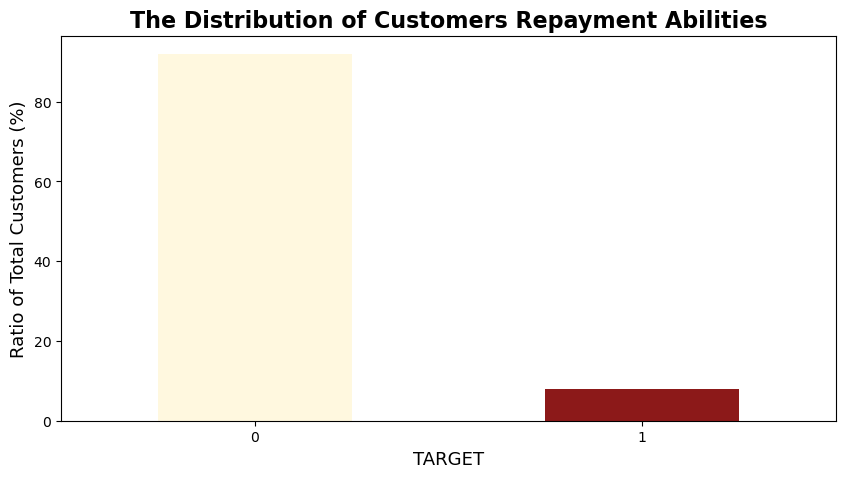

In [11]:
plt.figure(figsize=(10,5))
ratio_target.plot(kind='bar',color=['cornsilk','maroon'], alpha=0.9, rot=0)
plt.title('The Distribution of Customers Repayment Abilities', fontsize=16, weight='bold')
plt.xlabel('TARGET',fontsize=13)
plt.ylabel('Ratio of Total Customers (%)', fontsize=13)


Dari distribusi di atas dapat dilihat bahwa label pada TARGET keadaannya **imbalance**, hanya sekitar **8%** dari total seluruh customer yang mengalami kesulitan dalam pembayaran kredit (**TARGET = 1**). Lalu, **92%** customer tidak mengalami gagal bayar (**TARGET = 0**).

-**TARGET = 0 >> Customer yang tidak kesulitan dalam pembayaran**

-**TARGET = 1 >> Customer yang kesulitan dalam pembayaran**

### Categorical Feature vs Target - **Bivariate**

<AxesSubplot:title={'center':'Customers Repayment Abilities Based on Realty Ownership'}, xlabel='FLAG_OWN_REALTY', ylabel='count'>

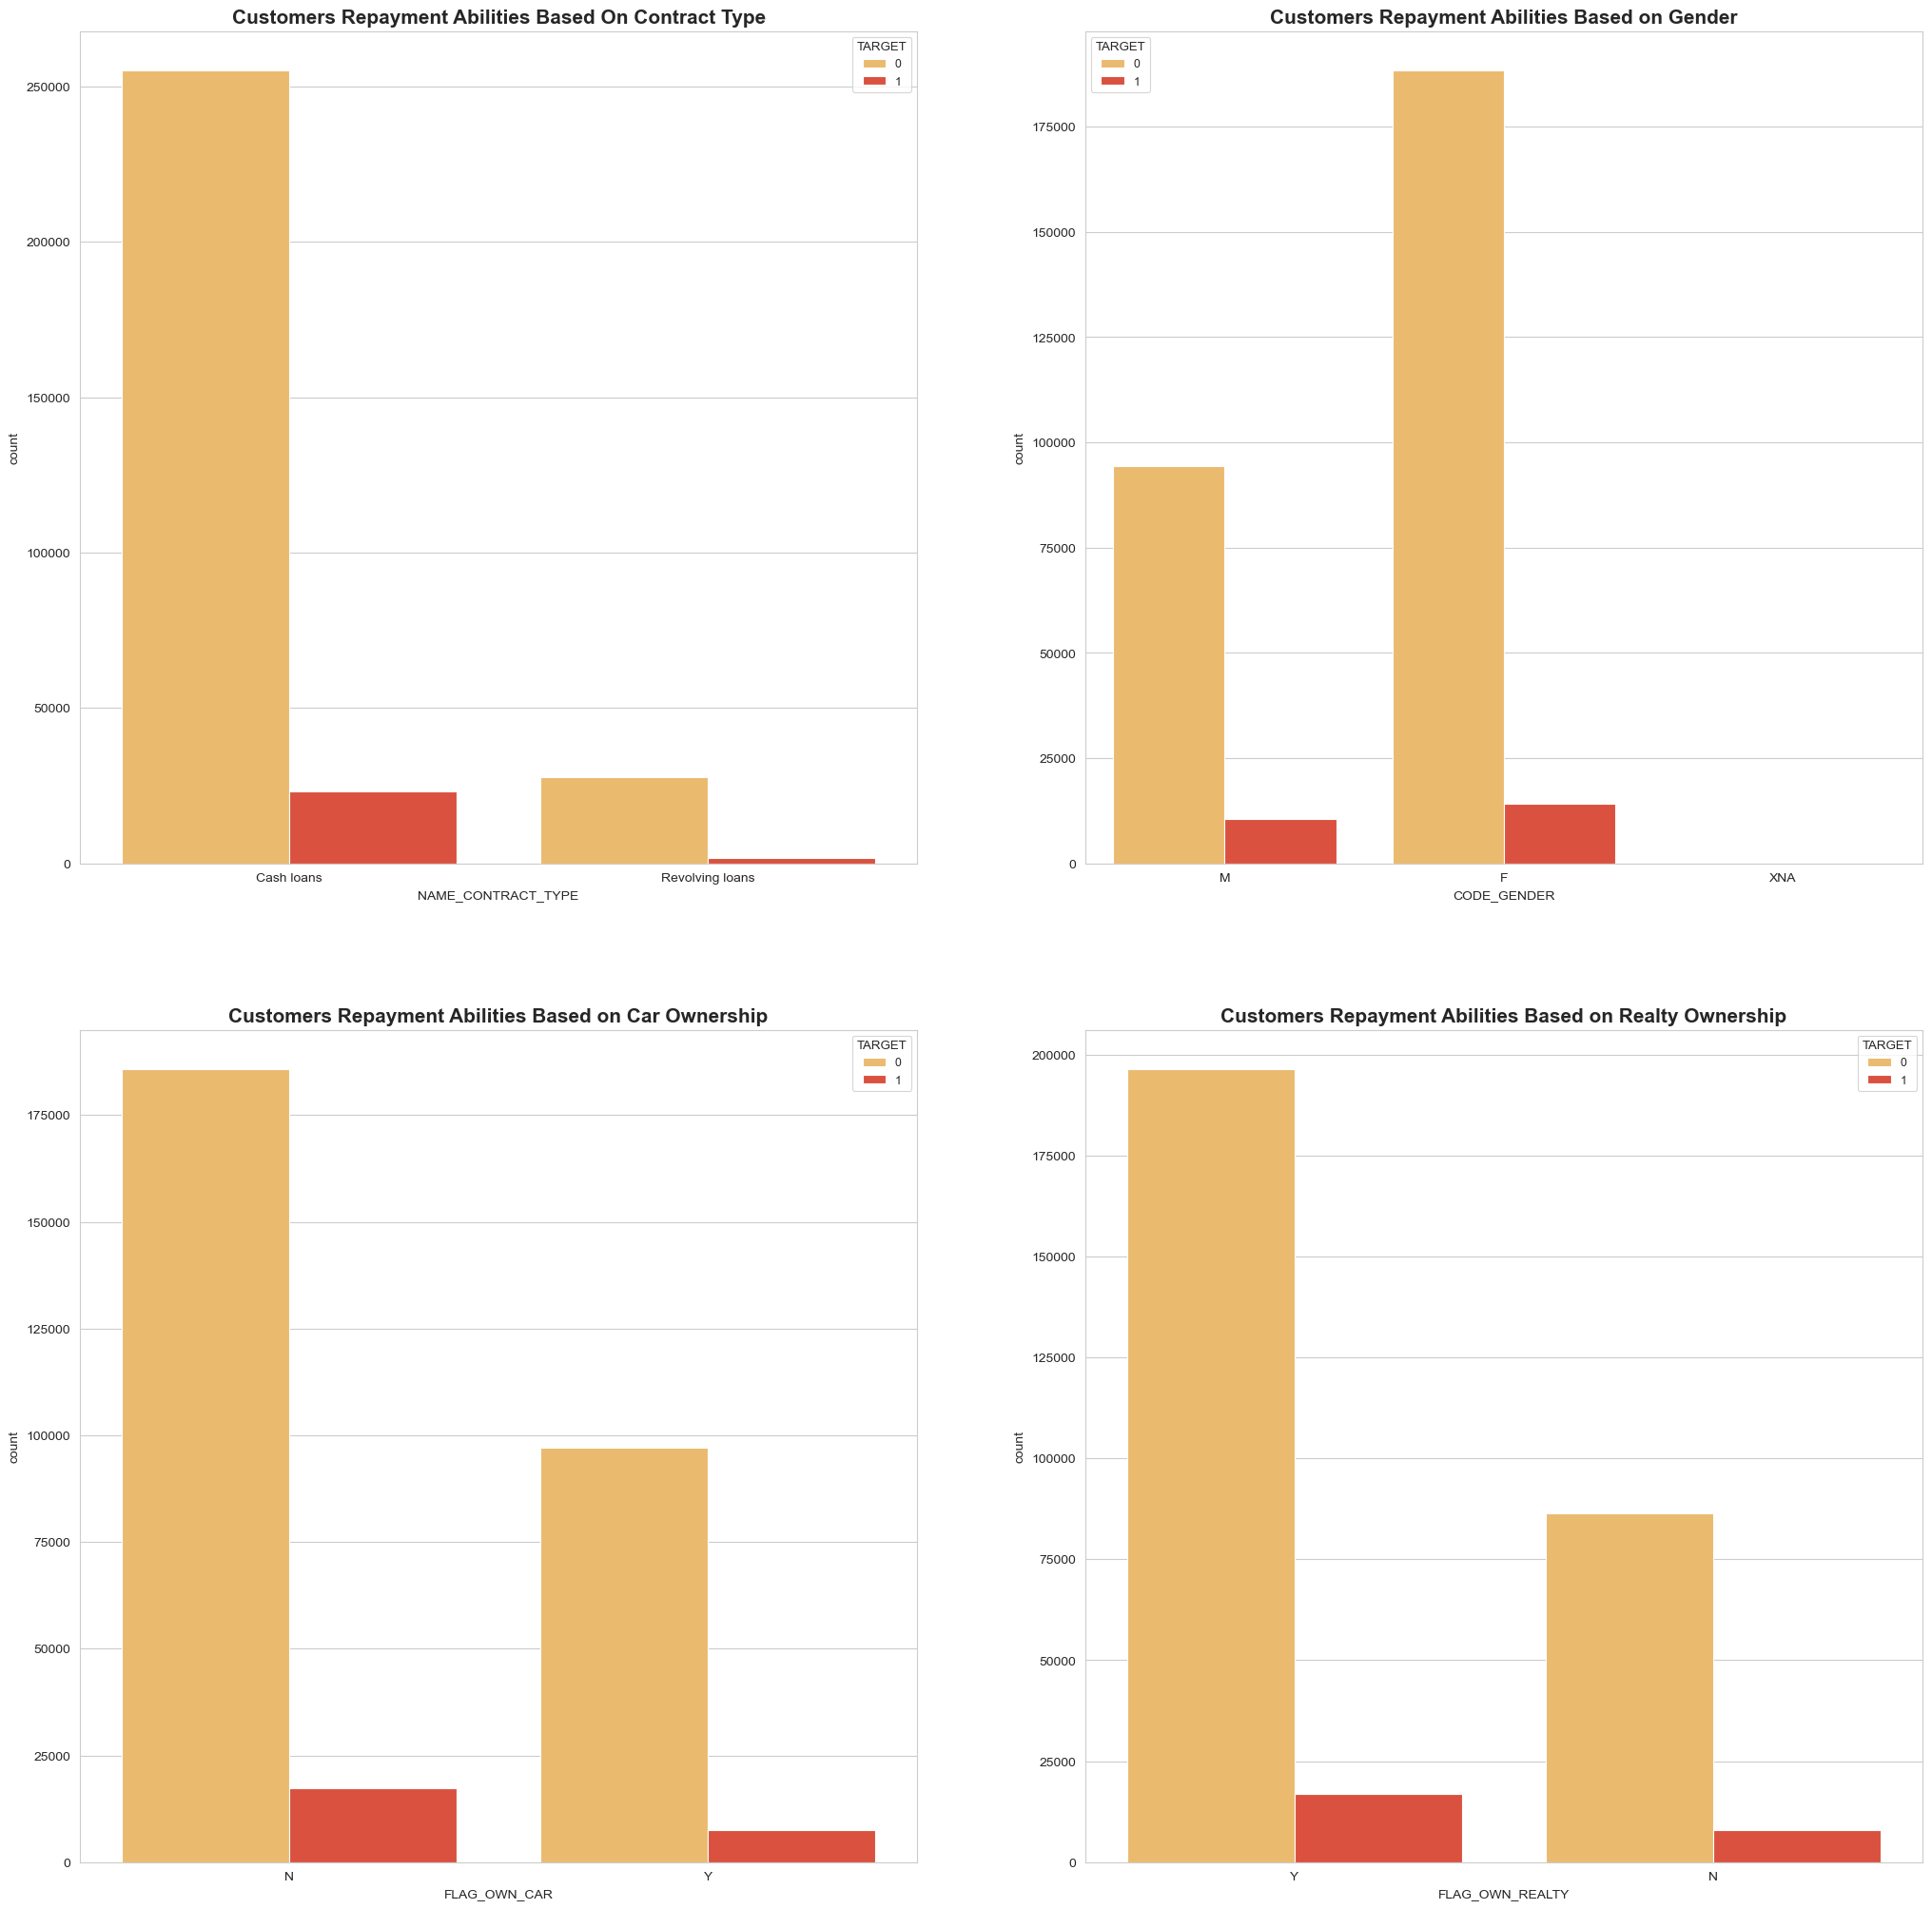

In [12]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Customers Repayment Abilities Based On Contract Type', fontweight='bold', fontsize=15)
sns.countplot(x='NAME_CONTRACT_TYPE', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[0][0])

ax[0][1].set_title('Customers Repayment Abilities Based on Gender', fontweight='bold', fontsize=15)
sns.countplot(x='CODE_GENDER', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[0][1])                   

ax[1][0].set_title('Customers Repayment Abilities Based on Car Ownership', fontweight='bold', fontsize=15)
sns.countplot(x='FLAG_OWN_CAR', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[1][0])                   

ax[1][1].set_title('Customers Repayment Abilities Based on Realty Ownership', fontweight='bold', fontsize=15)
sns.countplot(x='FLAG_OWN_REALTY', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[1][1])                   



### Contract_Type vs TARGET

ct = dft.groupby(['NAME_CONTRACT_TYPE','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
ct.sort_values(by=['NAME_CONTRACT_TYPE','SK_ID_CURR'],ascending=False)
ct.style.background_gradient(cmap='OrRd')                

- **Revolving loans** memiliki pengguna dengan jumlah **28K**, dengan pengguna yang memiliki kesulitan pembayaran sebanyak **1.6K**.

- **Cash Loans** memiliki pengguna dengan jumlah **278K**, dengan pengguna yang memiliki kesulitan pembayaran sebanyak **23K**.

### CODE_GENDER vs TARGET


In [13]:
dft['CODE_GENDER'] = dft['CODE_GENDER'].replace(['F','M'],['Female','Male'])

In [14]:
cdt = dft.groupby(['CODE_GENDER','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
cdt.columns=['CODE_GENDER','TARGET','TOTAL_CUSTOMERS']
cdt.sort_values(by=['TOTAL_CUSTOMERS','CODE_GENDER'],ascending=False)
cdt.style.background_gradient(cmap='OrRd')                

,CODE_GENDER,TARGET,TOTAL_CUSTOMERS
0,Female,0,188278
1,Female,1,14170
2,Male,0,94404
3,Male,1,10655
4,XNA,0,4


In [15]:
# Menghitung Rasio Label
df[['CODE_GENDER','TARGET']].groupby(['CODE_GENDER'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,CODE_GENDER,TARGET
1,M,0.101419
0,F,0.069993
2,XNA,0.000000


- Total pengajuan pembayaran oleh **Female** lebih banyak dibandingkan dengan **MALE** (**F = 10%, M = 7%**)
- Total pengajuan pembayaran oleh **Female** mencapai **202.5K**, dimana sebanyak **14.1K** mengalami kesulitan pembayaran
- Total pengajuan pembayaran oleh **MALE** sebanyak **105K**, dimana diantaranya sebanyak **10.6K** mengalami kesulitan pembayaran.


### Car Ownership vs Target

In [16]:
car_o = dft.groupby(['FLAG_OWN_CAR','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
car_o.columns=['FLAG_OWN_CAR','TARGET','TOTAL_CUSTOMERS']
car_o.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
car_o.style.background_gradient(cmap='OrRd')

,FLAG_OWN_CAR,TARGET,TOTAL_CUSTOMERS
0,N,0,185675
1,N,1,17249
2,Y,0,97011
3,Y,1,7576


In [17]:
# Menghitung rasio dari label
df[['FLAG_OWN_CAR','TARGET']].groupby(['FLAG_OWN_CAR'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_CAR,TARGET
0,N,0.085002
1,Y,0.072437


- Customer yang memiliki aset mobil **(sekitar 7%)**  memiliki masalah dalam pembayaran dibandingkan dengan yang tidak memiliki mobil (8%).

### Realty Ownership Status vs Target

In [18]:
realty_t = dft.groupby(['FLAG_OWN_REALTY','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
realty_t.columns=['FLAG_OWN_REALTY','TARGET','TOTAL_CUSTOMERS']
realty_t.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
realty_t.style.background_gradient(cmap='OrRd')

,FLAG_OWN_REALTY,TARGET,TOTAL_CUSTOMERS
0,N,0,86357
1,N,1,7842
2,Y,0,196329
3,Y,1,16983


In [19]:
# Menghitung rasio
df[['FLAG_OWN_REALTY','TARGET']].groupby(['FLAG_OWN_REALTY'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,FLAG_OWN_REALTY,TARGET
0,N,0.083249
1,Y,0.079616


- Customers yang tidak memiliki aset rumah atau bangunan (sekitar 8%) memiliki masalah dalam pembayaran dibandingkan dengan customer yang memilikinya (sekitar 8.3%). Meskipun keduanya tidak memiliki perbedaan yang siginifikan.

### Suite Type, Income Type, Education Type, Family Status

<AxesSubplot:title={'center':'Customers Repayment Abilities Based on Family Status'}, xlabel='NAME_FAMILY_STATUS', ylabel='count'>

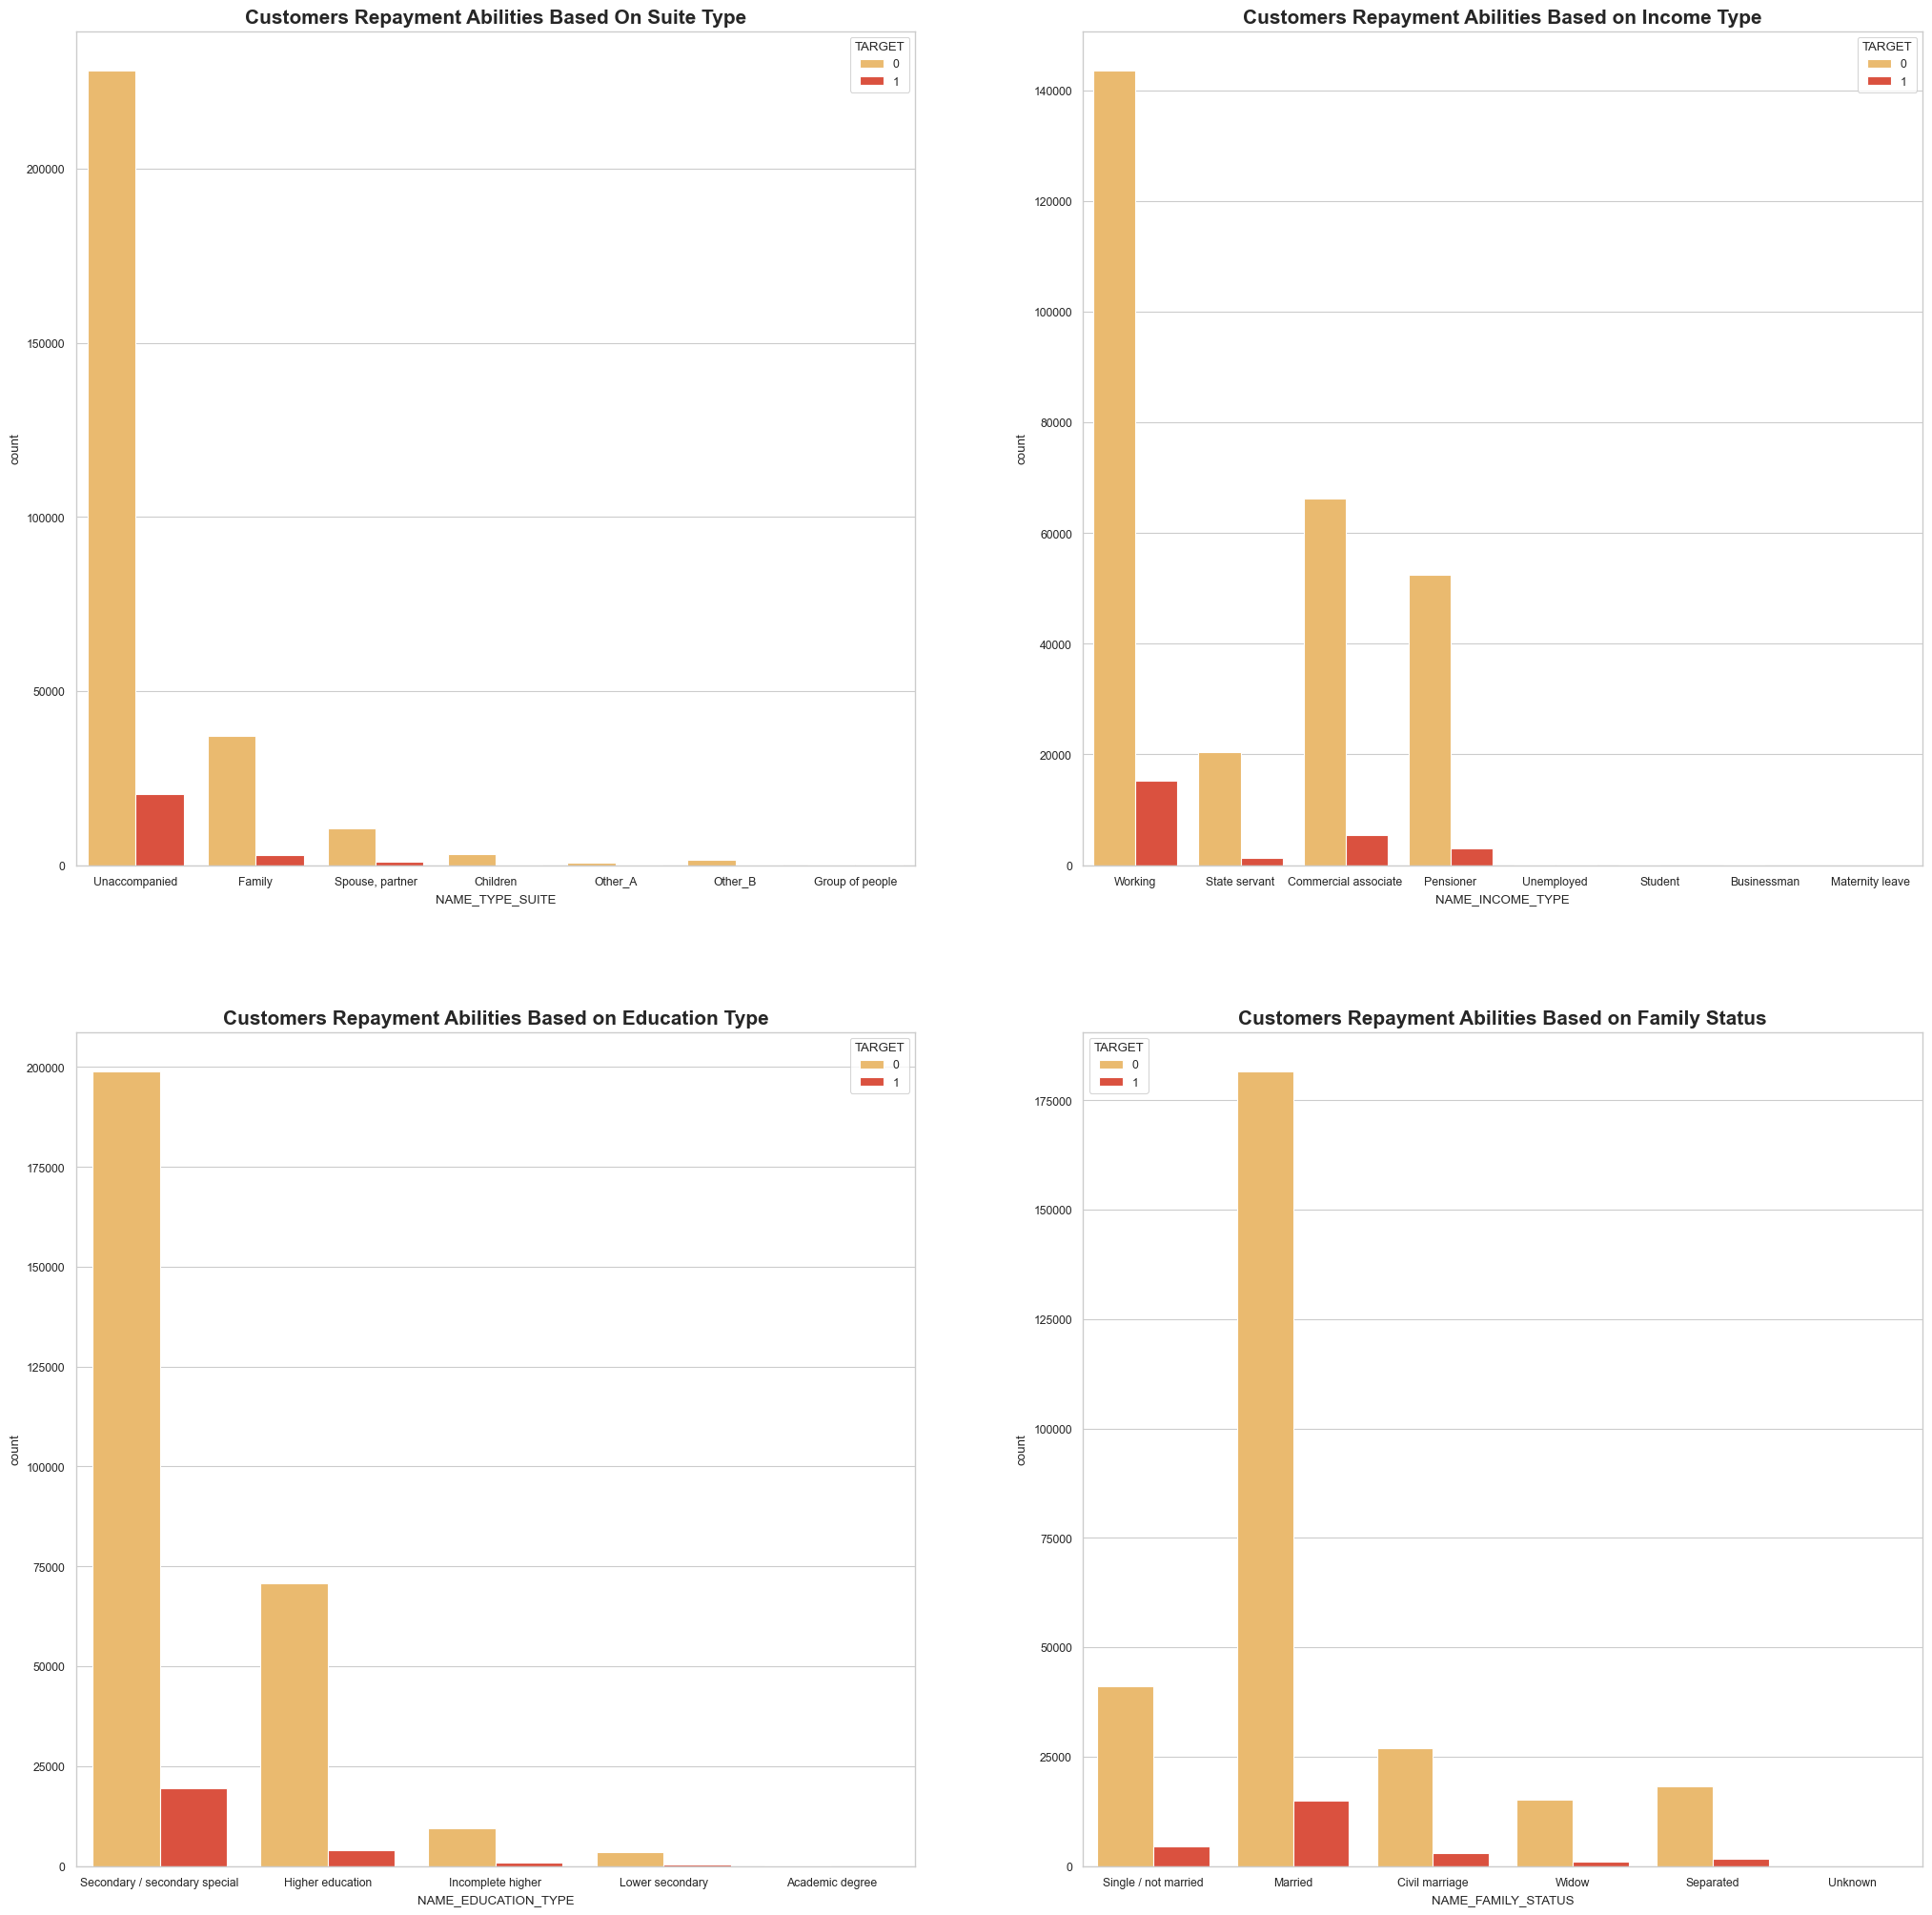

In [20]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(25,25))
sns.set_context('paper', font_scale=1)

ax[0][0].set_title('Customers Repayment Abilities Based On Suite Type', fontweight='bold', fontsize=15)
sns.countplot(x='NAME_TYPE_SUITE', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[0][0])

ax[0][1].set_title('Customers Repayment Abilities Based on Income Type', fontweight='bold', fontsize=15)
sns.countplot(x='NAME_INCOME_TYPE', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[0][1])                   

ax[1][0].set_title('Customers Repayment Abilities Based on Education Type', fontweight='bold', fontsize=15)
sns.countplot(x='NAME_EDUCATION_TYPE', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[1][0])                   

ax[1][1].set_title('Customers Repayment Abilities Based on Family Status', fontweight='bold', fontsize=15)
sns.countplot(x='NAME_FAMILY_STATUS', data=dft, hue='TARGET', palette = 'YlOrRd', ax=ax[1][1])                   



In [21]:
st = dft.groupby(['NAME_TYPE_SUITE', 'TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
st.columns=['NAME_TYPE_SUITE','TARGET','TOTAL_CUSTOMERS']
st.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
st.style.background_gradient(cmap='OrRd')

,NAME_TYPE_SUITE,TARGET,TOTAL_CUSTOMERS
0,Children,0,3026
1,Children,1,241
2,Family,0,37140
3,Family,1,3009
4,Group of people,0,248
5,Group of people,1,23
6,Other_A,0,790
7,Other_A,1,76
8,Other_B,0,1596
9,Other_B,1,174


In [22]:
# Menghitung rasio name_type_suite terhadap target
df[['NAME_TYPE_SUITE','TARGET']].groupby(['NAME_TYPE_SUITE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_TYPE_SUITE,TARGET
4,Other_B,0.098305
3,Other_A,0.087760
2,Group of people,0.084871
6,Unaccompanied,0.081830
5,"Spouse, partner",0.078716
1,Family,0.074946
0,Children,0.073768


- Customer yang perusahaannya **Other_B** mengalami kegagalan pembayaran dengan rasio yang paling besar mencapai **9.8%**, kemudian diikuti oleh Other_A, Group of people, Unaccompanied, etc


### Income Type

In [23]:
inct = dft.groupby(['NAME_INCOME_TYPE','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
inct.columns=['NAME_INCOME_TYPE','TARGET','TOTAL_CUSTOMERS']
inct.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
inct.style.background_gradient(cmap='OrRd')

,NAME_INCOME_TYPE,TARGET,TOTAL_CUSTOMERS
0,Businessman,0,10
1,Commercial associate,0,66257
2,Commercial associate,1,5360
3,Maternity leave,0,3
4,Maternity leave,1,2
5,Pensioner,0,52380
6,Pensioner,1,2982
7,State servant,0,20454
8,State servant,1,1249
9,Student,0,18


In [24]:
# Menghitung rasio name_type_suite terhadap target
df[['NAME_INCOME_TYPE','TARGET']].groupby(['NAME_INCOME_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_INCOME_TYPE,TARGET
2,Maternity leave,0.400000
6,Unemployed,0.363636
7,Working,0.095885
1,Commercial associate,0.074843
4,State servant,0.057550
3,Pensioner,0.053864
0,Businessman,0.000000
5,Student,0.000000


- Pendapatan dari **Maternity leave** memiliki jumlah yang paling banyak mengalami kesulitan dalam pembayaran mencapai 40%, sedangkan **businessman & student** paling tidak mengalami kesulitan dalam pembayaran.
- Pendapatan yang diperoleh dari tipe **Working** memiliki pengajuan dengan jumlah paling banyak mencapai **158.7K**

### Education Type

In [25]:
edt = dft.groupby(['NAME_EDUCATION_TYPE','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
edt.columns=['NAME_EDUCATION_TYPE','TARGET','TOTAL_CUSTOMERS']
edt.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
edt.style.background_gradient(cmap='OrRd')

,NAME_EDUCATION_TYPE,TARGET,TOTAL_CUSTOMERS
0,Academic degree,0,161
1,Academic degree,1,3
2,Higher education,0,70854
3,Higher education,1,4009
4,Incomplete higher,0,9405
5,Incomplete higher,1,872
6,Lower secondary,0,3399
7,Lower secondary,1,417
8,Secondary / secondary special,0,198867
9,Secondary / secondary special,1,19524


In [26]:
# Rasio education_type terhadap target
df[['NAME_EDUCATION_TYPE','TARGET']].groupby(['NAME_EDUCATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_EDUCATION_TYPE,TARGET
3,Lower secondary,0.109277
4,Secondary / secondary special,0.089399
2,Incomplete higher,0.084850
1,Higher education,0.053551
0,Academic degree,0.018293


- Customer dengan **Lower secondary** mengalami kesulitan pembayaran dengan rasio persen yang paling tinggi dan jumlahnya mencapai **11%**
- sedangkan , customer dengan background edukasi **Academic Degree** paling tidak mengalami masalah dalam pembayaran mencapai **1.8%** dan 
- **Secondary** menjadi backdground edukasi yang paling banyak dalam pengajuan mencapai **218K**

### Family Status

In [27]:
ft = dft.groupby(['NAME_FAMILY_STATUS','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
ft.columns=['NAME_FAMILY_TYPE','TARGET','TOTAL_CUSTOMERS']
ft.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
ft.style.background_gradient(cmap='OrRd')

,NAME_FAMILY_TYPE,TARGET,TOTAL_CUSTOMERS
0,Civil marriage,0,26814
1,Civil marriage,1,2961
2,Married,0,181582
3,Married,1,14850
4,Separated,0,18150
5,Separated,1,1620
6,Single / not married,0,40987
7,Single / not married,1,4457
8,Unknown,0,2
9,Widow,0,15151


In [28]:
# rasio family status terhadap target
df[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


- Customer dengan status **Civil marriage** memiliki rasio persentase yang tinggi dalam masalah pembayaran mencapai 9.9%, kemudian diikuti **Single/not married** dengan rasio mencapai 9.8%
- Customer dengan status **Married** paling banyak mengajukan pembayaran dengan jumlah mencapai 196.5K


### Housing Type, Occupation Type, Process Day, and Organization Type

### Housing Type vs Target

In [29]:
ht = dft.groupby(['NAME_HOUSING_TYPE','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
ht.columns=['NAME_HOUSING_TYPE','TARGET','TOTAL_CUSTOMERS']
ht.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
ht.style.background_gradient(cmap='OrRd')

,NAME_HOUSING_TYPE,TARGET,TOTAL_CUSTOMERS
0,Co-op apartment,0,1033
1,Co-op apartment,1,89
2,House / apartment,0,251596
3,House / apartment,1,21272
4,Municipal apartment,0,10228
5,Municipal apartment,1,955
6,Office apartment,0,2445
7,Office apartment,1,172
8,Rented apartment,0,4280
9,Rented apartment,1,601


In [30]:
df[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


- Customer dengan tempat tinggal tipe **Rented apartement** mengalami kesulitan dalam pembayaran kredit dengan rasio persentase **12%**
- Customer dengan tempat tinggal berupa rumah/apartment paling banyak melakukan pengajuan kredit
- Customer dengan tempat tinggal **Office apartment** dengan rasio terendah dalam masalah pembayaran

### Occupation Type vs Target

In [31]:
occt = dft.groupby(['OCCUPATION_TYPE','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
occt.columns=['OCCUPATION_TYPE','TARGET','TOTAL_CUSTOMERS']
occt.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
occt.style.background_gradient(cmap='OrRd')

,OCCUPATION_TYPE,TARGET,TOTAL_CUSTOMERS
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


In [32]:
df[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


- **Low-skill Laborers** memiliki rasio tertinggi dalam mengalami kesulitan pembayaran kredit mencapai **17%** dan diikuti dengan **drivers** sebanyak **11%**
- **Laborers** paling banyak mengajukan pinjaman kredit
- **Accountants** memiliki rasio terendah yang tidak mengalami kesulitan dalam pembayaran pinjaman mencapai **4.8%**

### Process Day vs Target

In [33]:
pdt = dft.groupby(['WEEKDAY_APPR_PROCESS_START','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
pdt.columns=['WEEKDAY_APPR_PROCESS_START','TARGET','TOTAL_CUSTOMERS']
pdt.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
pdt.style.background_gradient(cmap='OrRd')

,WEEKDAY_APPR_PROCESS_START,TARGET,TOTAL_CUSTOMERS
0,FRIDAY,0,46237
1,FRIDAY,1,4101
2,MONDAY,0,46780
3,MONDAY,1,3934
4,SATURDAY,0,31182
5,SATURDAY,1,2670
6,SUNDAY,0,14898
7,SUNDAY,1,1283
8,THURSDAY,0,46493
9,THURSDAY,1,4098


In [34]:
df[['WEEKDAY_APPR_PROCESS_START','TARGET']].groupby(['WEEKDAY_APPR_PROCESS_START'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,WEEKDAY_APPR_PROCESS_START,TARGET
5,TUESDAY,0.083505
6,WEDNESDAY,0.081604
0,FRIDAY,0.081469
4,THURSDAY,0.081003
3,SUNDAY,0.079291
2,SATURDAY,0.078873
1,MONDAY,0.077572


Text(0.5, 0, 'Processing Day')

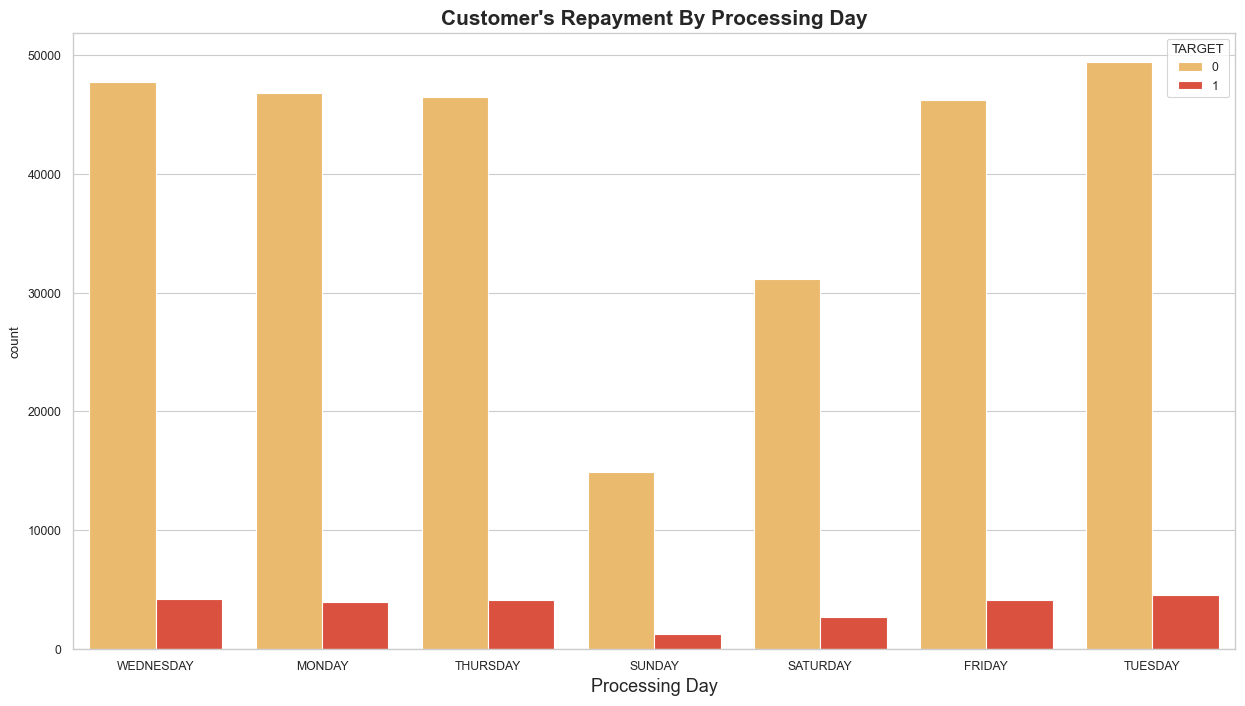

In [35]:
# Visualisasi Processing day vs Target
plt.figure(figsize=(15,8))
ax = sns.countplot(x='WEEKDAY_APPR_PROCESS_START', data=dft, hue='TARGET',palette='YlOrRd')
plt.title("Customer's Repayment By Processing Day", fontsize=15, fontweight='bold')
plt.xlabel('Processing Day', fontsize=13)

- Di setiap harinya, pemrosesan pembayaran kredit hampir semuanya sama sekitar 7-8% pada TARGET=1 atau customer yang memiliki kesulitan dalam pembayaran

### Organization Type vs Target

In [36]:
ott = dft.groupby(['ORGANIZATION_TYPE','TARGET']).agg({'SK_ID_CURR':'count'}).reset_index()
ott.columns=['ORGANIZATION_TYPE','TARGET','TOTAL_CUSTOMERS']
ott.sort_values(by=['TOTAL_CUSTOMERS'],ascending=False)
ott.style.background_gradient(cmap='OrRd')

,ORGANIZATION_TYPE,TARGET,TOTAL_CUSTOMERS
0,Advertising,0,394
1,Advertising,1,35
2,Agriculture,0,2197
3,Agriculture,1,257
4,Bank,0,2377
5,Bank,1,130
6,Business Entity Type 1,0,5497
7,Business Entity Type 1,1,487
8,Business Entity Type 2,0,9653
9,Business Entity Type 2,1,900


In [37]:
df[['ORGANIZATION_TYPE','TARGET']].groupby(['ORGANIZATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,ORGANIZATION_TYPE,TARGET
54,Transport: type 3,0.157540
18,Industry: type 13,0.134328
25,Industry: type 8,0.125000
38,Restaurant,0.117062
7,Construction,0.116798
6,Cleaning,0.111538
14,Industry: type 1,0.110683
20,Industry: type 3,0.106162
36,Realtor,0.106061
1,Agriculture,0.104727


- Customers dengan tipe organizer yang mengalami masalah dalam pembayaran yaitu jenis **Transport:type 3** dengan rasio persentase mencapai **15%**

### Numerical Features vs Target - **Bivariate Analysis**

### Amount Credit (AMT_CREDIT) vs Target

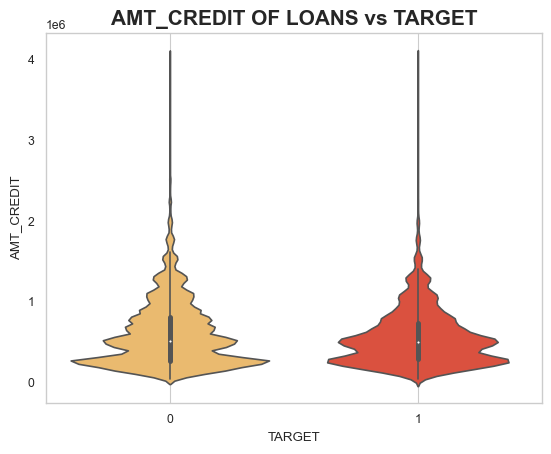

In [38]:
sns.violinplot(x='TARGET', y='AMT_CREDIT', data=dft, palette='YlOrRd')
plt.grid()
plt.title('AMT_CREDIT OF LOANS vs TARGET', fontsize=15, fontweight='bold')
plt.show()

- Untuk customer yang tidak memiliki masalah dalam pembayaran **(TARGET=0)** menurut visualisasi di atas memang memiliki median jumlah kredit yang lebih lebar dibandingkan dengan customers yang memiliki masalah kesulitan **(TARGET=1)**. Hal ini menunjukkan bahwa customers yang tidak memiliki kesulitan dalam pembayaran memiliki kesempatan yang lebih besar untuk mampu mengembalikan uang yang dipinjam.

### Amount Income vs Target

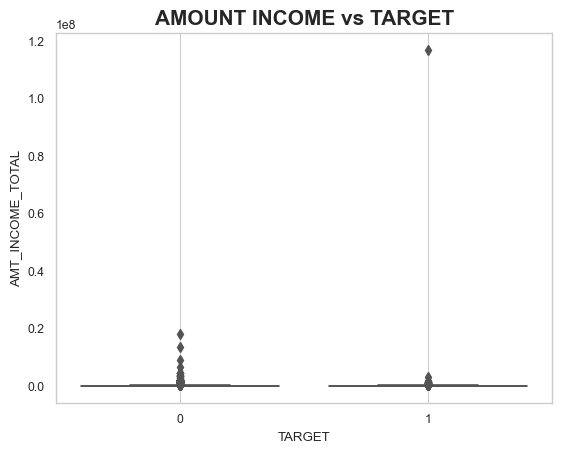

In [39]:
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=dft, palette='YlOrRd')
plt.grid()
plt.title('AMOUNT INCOME vs TARGET', fontsize=15, fontweight='bold')
plt.show()

Tidak ada perbedaan yang signifikan diantara customers yang memiliki masalah kesulitan pembayaran maupun yang tidak. 

### Age vs Target

In [40]:
no_age = dft[dft['TARGET']==0]['DAYS_BIRTH'].values/-365
yes_age = dft[dft['TARGET']==1]['DAYS_BIRTH'].values/-365

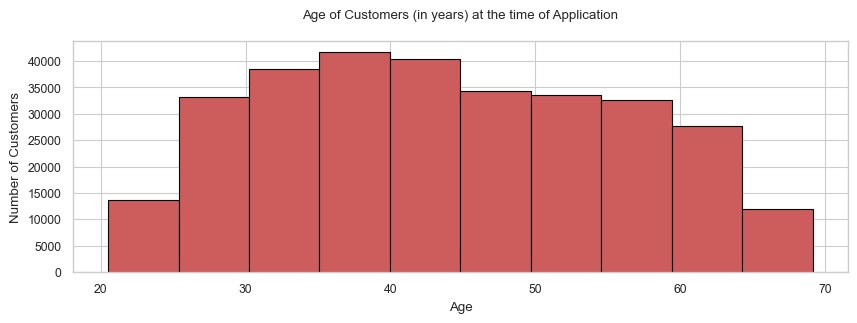

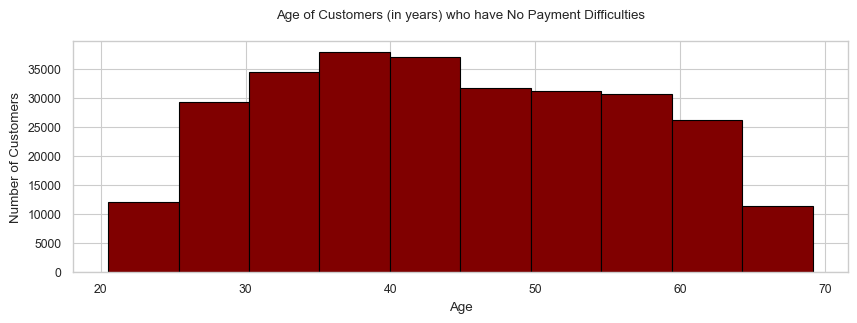

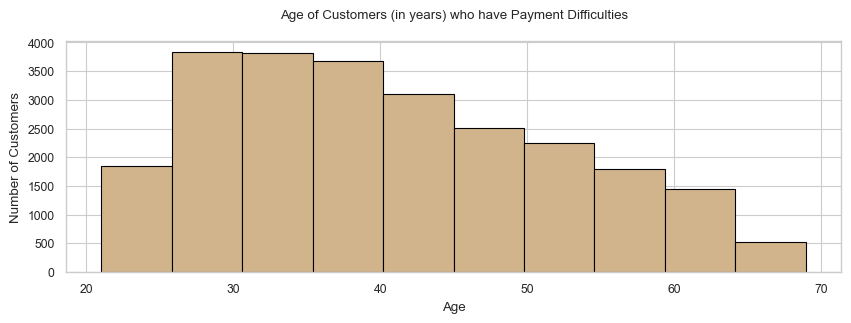

In [41]:
plt.figure(figsize=(10,3))
plt.hist(dft['DAYS_BIRTH'].values/-365, bins=10, edgecolor='black', color='indianred')
plt.title('Age of Customers (in years) at the time of Application\n')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(no_age, bins=10, edgecolor='black', color='maroon')
plt.title('Age of Customers (in years) who have No Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

plt.figure(figsize=(10,3))
plt.hist(yes_age, bins=10, edgecolor='black', color='tan')
plt.title('Age of Customers (in years) who have Payment Difficulties\n')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

- Customers yang paling banyak mengajukan pinjaman kredit berumur sekitar 35-40 tahun, kemudian diikuti oleh customer dengan umur 41-45 tahun
- Customers yang tidak memiliki masalah atau kesulitan dalam pembayaran (TARGET=0) yaitu yang berumur sekitar 35-40 tahun
- Customer yang memiliki masalah dan kesulitan pembayaran kredit (TARGET=1) yaitu yang berumur sekitar 25-35 tahun, hal ini karena di umur yang masih muda atau masa awal dalam merintis masa karir sehingga belum mengalami financial sustainable, oleh karenanya di umur sekian masih kesulitan dalam membayarkan pinjaman kredit

### Multivariate Visualization

### 1. Car Ownership, Realty Ownership, and Number of Children

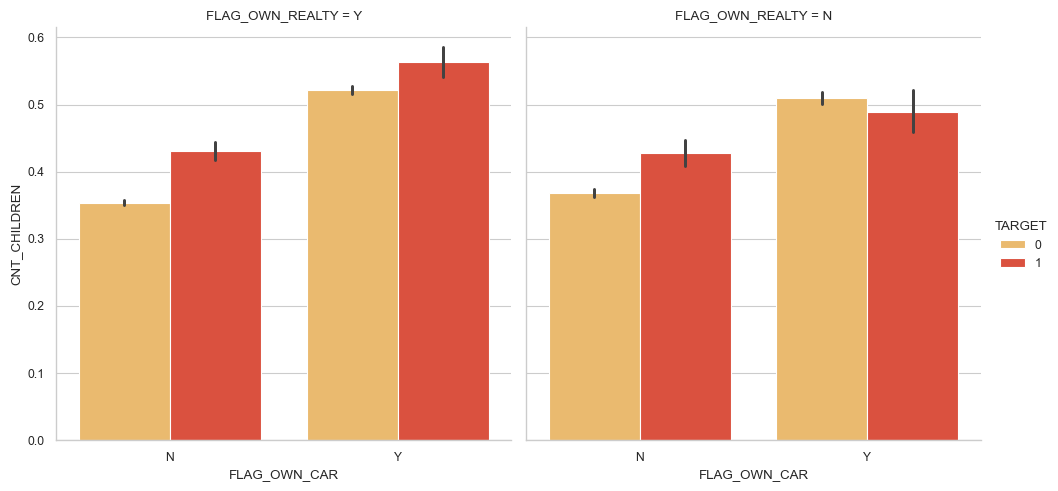

In [42]:
sns.catplot(x='FLAG_OWN_CAR',y='CNT_CHILDREN',
              hue='TARGET',col='FLAG_OWN_REALTY',
              kind='bar', palette = 'YlOrRd', data=dft)
plt.show()

- Customer yang memiliki realty (flat/home) sendiri dan mobil (car) sendiri namun memiliki jumlah anak (child) yang banyak memiliki masalah atau kesulitan dalam pembayaran pinjaman, dibandingkan dengan customer yang tidak memiliki rumah sendiri serta memiliki jumlah anak yang lebih sedikit.

### 2. Income Type, Amount of Good Price, Realty_Ownership

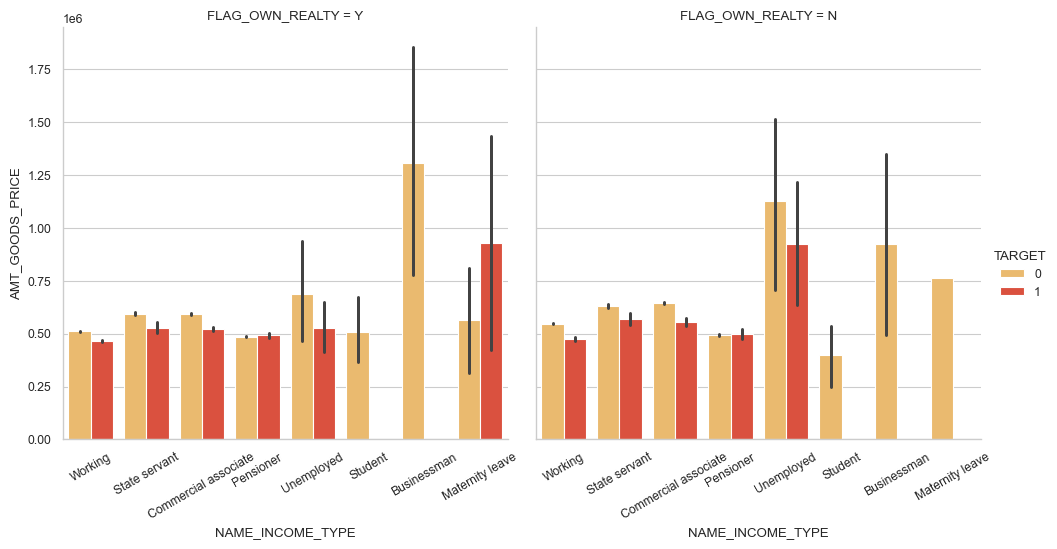

In [43]:
ax = sns.catplot(x='NAME_INCOME_TYPE', y='AMT_GOODS_PRICE',
                 hue='TARGET', data=dft,
                 col='FLAG_OWN_REALTY', kind='bar',
                 palette='YlOrRd')
ax.set_xticklabels(rotation=30)
plt.show()

- Customer yang memiliki pendapatan hanya dari **Maternity Leave** namun memiliki HOME/FLAT memiliki masalah kesulitan dalam pembayaran pinjaman. Sedangkan, untuk yang tidak memiliki HOME/FLAT meskipun pendapatan hanya dari Maternity Leave dia tidak kesulitan


### 3. Family Status, Amount of Income, Realty_Ownership

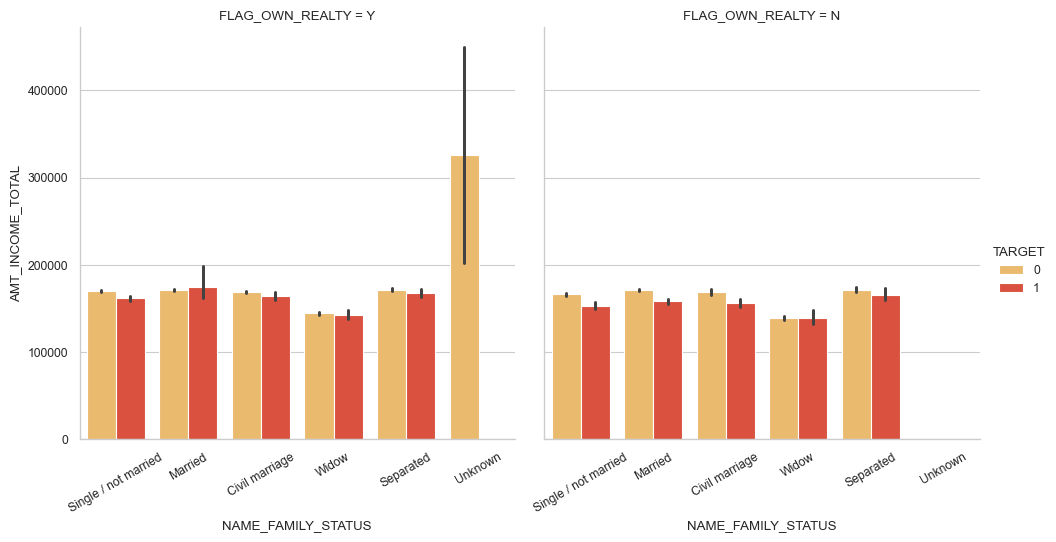

In [44]:
ax = sns.catplot(x='NAME_FAMILY_STATUS', y='AMT_INCOME_TOTAL',
                 hue='TARGET', data=dft,
                 col='FLAG_OWN_REALTY', kind='bar',
                 palette='YlOrRd')
ax.set_xticklabels(rotation=30)
plt.show()

- Customer yang berstatus menikah **(Married)** dan memiliki **REALTY/HOME/FLAT** memiliki kesulitan pembayaran pinjaman lebih tinggi dibandingkan dengan mereka yang berstatus **Married** namun **tidak memiliki REALTY/HOME/FLAT**

### Grouped by Car Ownership Status

### 1. Contract Type, Total of Children, Car Ownership 

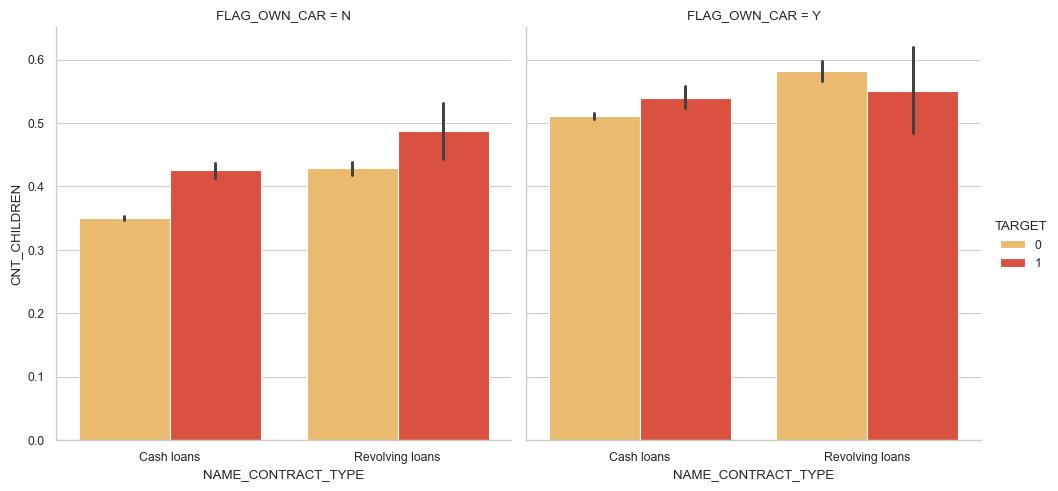

In [45]:
sns.catplot(x='NAME_CONTRACT_TYPE',y='CNT_CHILDREN',
              hue='TARGET',col='FLAG_OWN_CAR',
              kind='bar', palette = 'YlOrRd', data=dft)
plt.show()

- Bagi customer yang memiliki mobil/car pribadi baik yang mengambil kontrak Cash Loans maupun Revolving Loans, persentasenya lebih banyak yang mengalami masalah dalam pembayaran pinjaman dibandingkan dengan customer yang tidak memiliki mobil/car.
- **Revolving Loans** memiliki persentase yang lebih tinggi pada customer yang memiliki kesulitan dalam pembayaran

### Grouped by Contract Type

### 1. Income Type, Amount of Credit, Contract Type

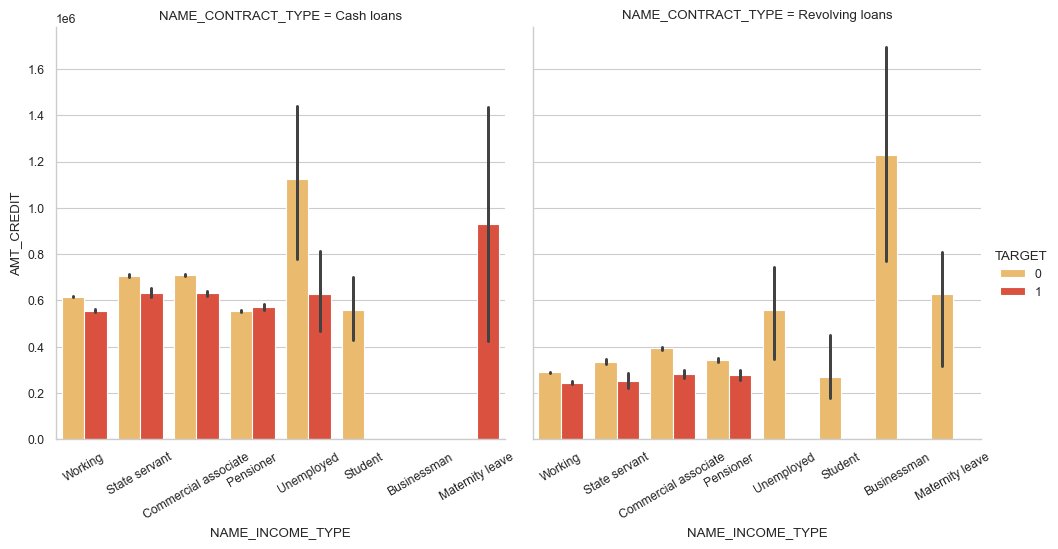

In [46]:
ax = sns.catplot(x='NAME_INCOME_TYPE', y='AMT_CREDIT',
                 hue='TARGET', data=dft,
                 col='NAME_CONTRACT_TYPE', kind='bar',
                 palette='YlOrRd')
ax.set_xticklabels(rotation=30)
plt.show()

- **Maternity Leave** pada **Cash Loans**, customer yang memiliki income tersebut memiliki jumlah pinjaman yang lebih banyak dan mengalami kesulitan pembayaran kredit dibandingkan dengan maternity leave pada **Revolving Loans** yang sama sekali tidak ada customer yang mengalami kesulitan dalam pembayaran.
- **Unemployed** pada **Cash Loans**, jumlah customers yang membayar pinjaman tinggi dan tidak memiliki masalah pembayaran itu jumlahnya lebih tinggi dibandingkan dengan yang kesulitan membayar, namun **Unemployed** pada **Revolving Loans** tidak ada customer yang memiliki kesulitan dalam pembayaran
- **Student**, baik itu pinjaman jenis Cash maupun Revolving keduanya tidak ada yang memiliki kesulitan dalam pembayaran.


### Grouped by Rating of Region Customer Lives

### 1. Housing Type, Ammount Credit, Rating of Region

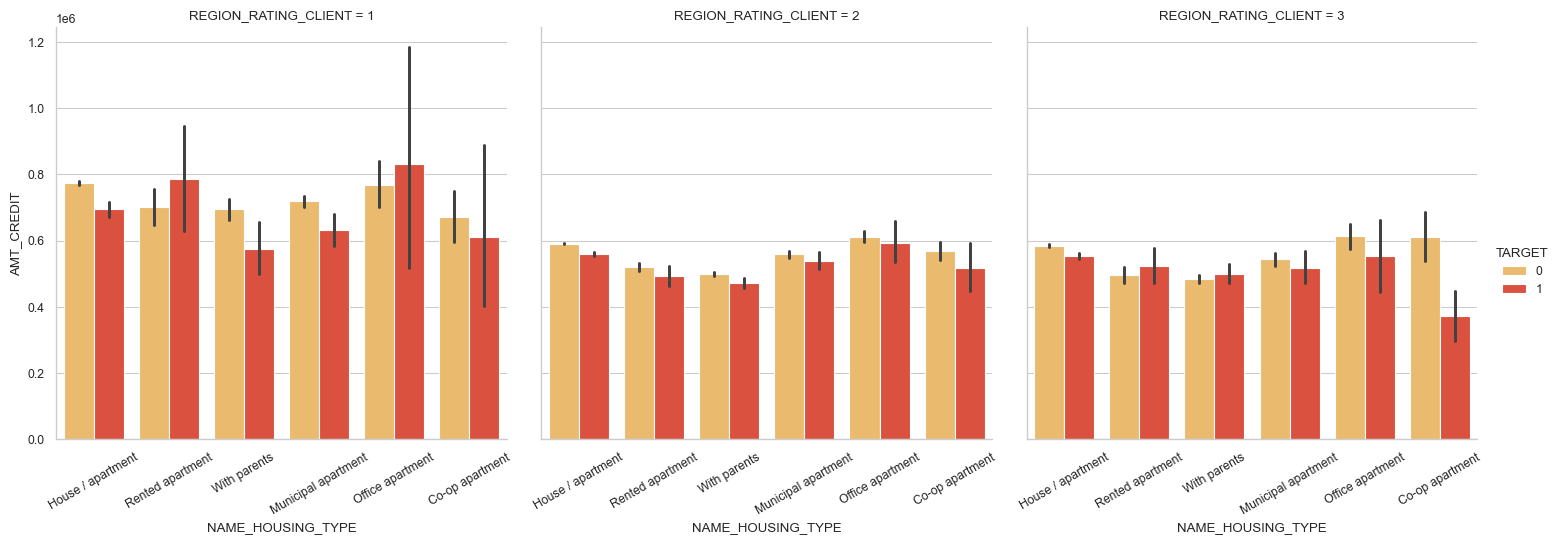

In [47]:
ax = sns.catplot(x='NAME_HOUSING_TYPE', y='AMT_CREDIT',
                 hue='TARGET', data=dft,
                 col='REGION_RATING_CLIENT', kind='bar',
                 palette='YlOrRd')
ax.set_xticklabels(rotation=30)
plt.show()

- Customer yang tinggal di Region Rating 1 dan jenis Office Apartement memiliki masalah kesulitan dalam pembayaran kredit

### 2. Education Type, Amount Credit, Rating of Region Leave

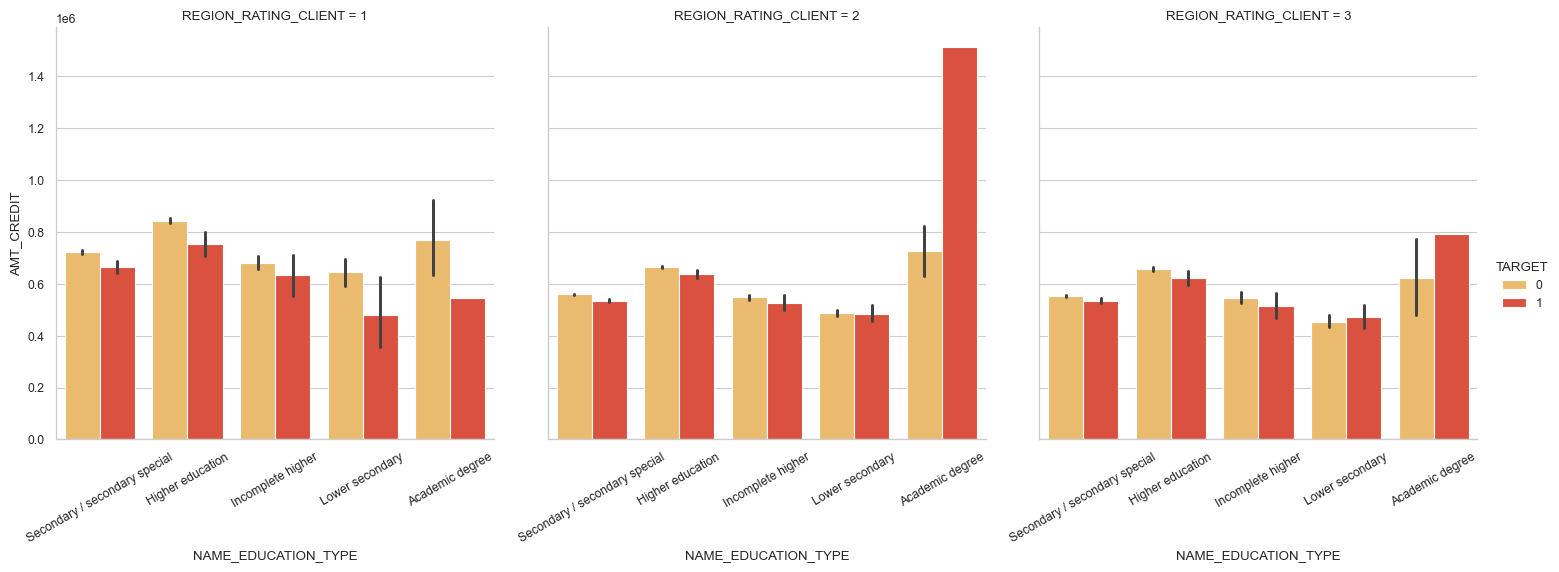

In [48]:
ax = sns.catplot(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT',
                 hue='TARGET', data=dft,
                 col='REGION_RATING_CLIENT', kind='bar',
                 palette='YlOrRd')
ax.set_xticklabels(rotation=30)
plt.show()

- Customer yang berada di **Region Rating = 2 dan 3** dan jenis edukasi **Academic degree** memiliki kesulitan dalam pembayaran

### 3. Family Status, Amount Credit, Rating of Region Leave

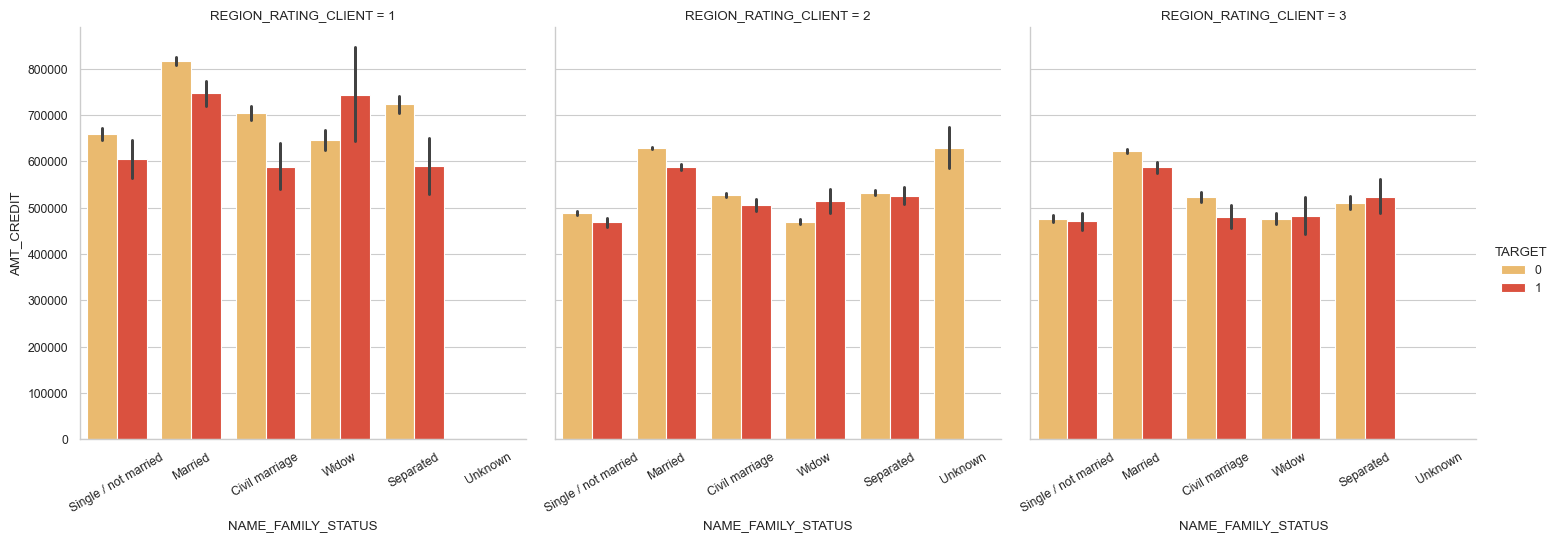

In [49]:
ax = sns.catplot(x='NAME_FAMILY_STATUS', y='AMT_CREDIT',
                 hue='TARGET', data=dft,
                 col='REGION_RATING_CLIENT', kind='bar',
                 palette='YlOrRd')
ax.set_xticklabels(rotation=30)
plt.show()

- Customer yang berada di **Region_Rating = 1, 2, dan 3** serta family status as **Widow** memiliki kesulitan dalam pembayaran kredit

# **Data Pre-processing**

## Handling Data Duplication

In [50]:
dft.duplicated().sum()

0

## Handling Missing Values

In [51]:
# drop fitur yang memiliki missing values > 50%
dft.drop(dft.iloc[:, 44:91], inplace=True, axis=1)
dft.drop(['OWN_CAR_AGE','EXT_SOURCE_1'], inplace=True, axis=1)

In [52]:
# after drop some features
print("Missing values status: ", dft.isnull().values.any())
tnv = pd.DataFrame(dft.isnull().sum().sort_values(), columns=['Total Row of Null Values'])
tnv['Ratio_%'] = (tnv['Total Row of Null Values']/dft.shape[0])*100
tnv.sort_values(by=['Ratio_%'], ascending=False).reset_index()

Missing values status:  True


,index,Total Row of Null Values,Ratio_%
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.501631
3,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
5,AMT_REQ_CREDIT_BUREAU_QRT,41519,13.501631
6,AMT_REQ_CREDIT_BUREAU_MON,41519,13.501631
7,AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.501631
8,NAME_TYPE_SUITE,1292,0.420148
9,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.332021


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Distribution of Numerical Features \nThat Have Missing Values')

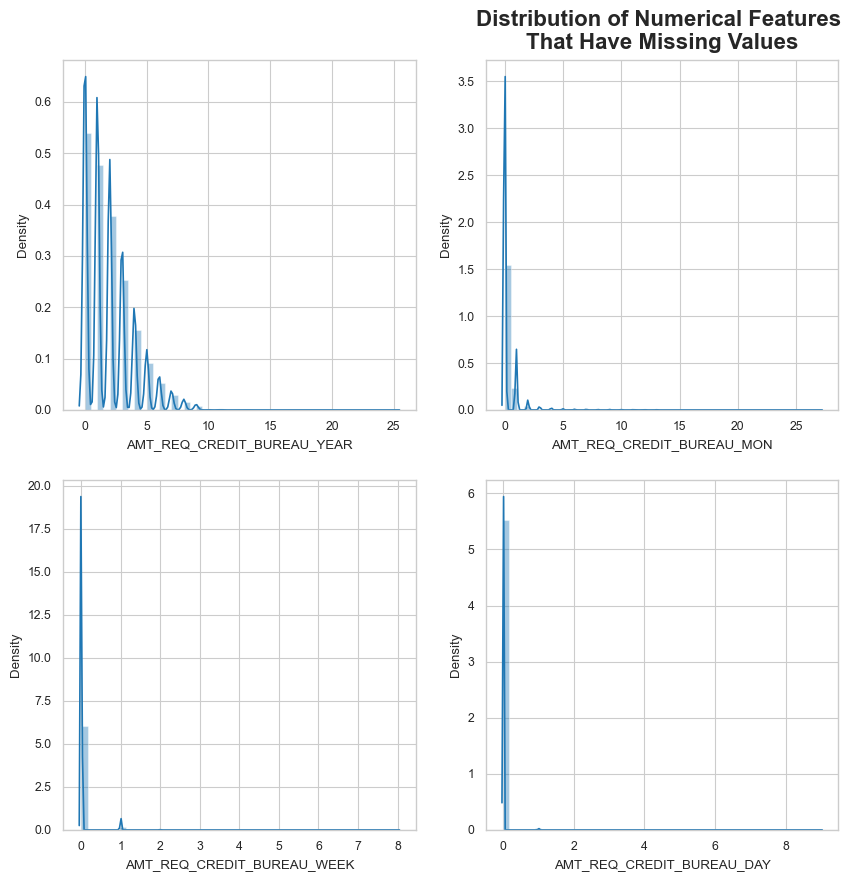

In [53]:
# Distribusi fitur numerical yang miliki null values part 1
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dft['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(dft['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(dft['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(dft['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

plt.title('Distribution of Numerical Features \nThat Have Missing Values',loc='center',pad=310, fontsize=16, fontweight='bold')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Distribution of Numerical Features \nThat Have Missing Values')

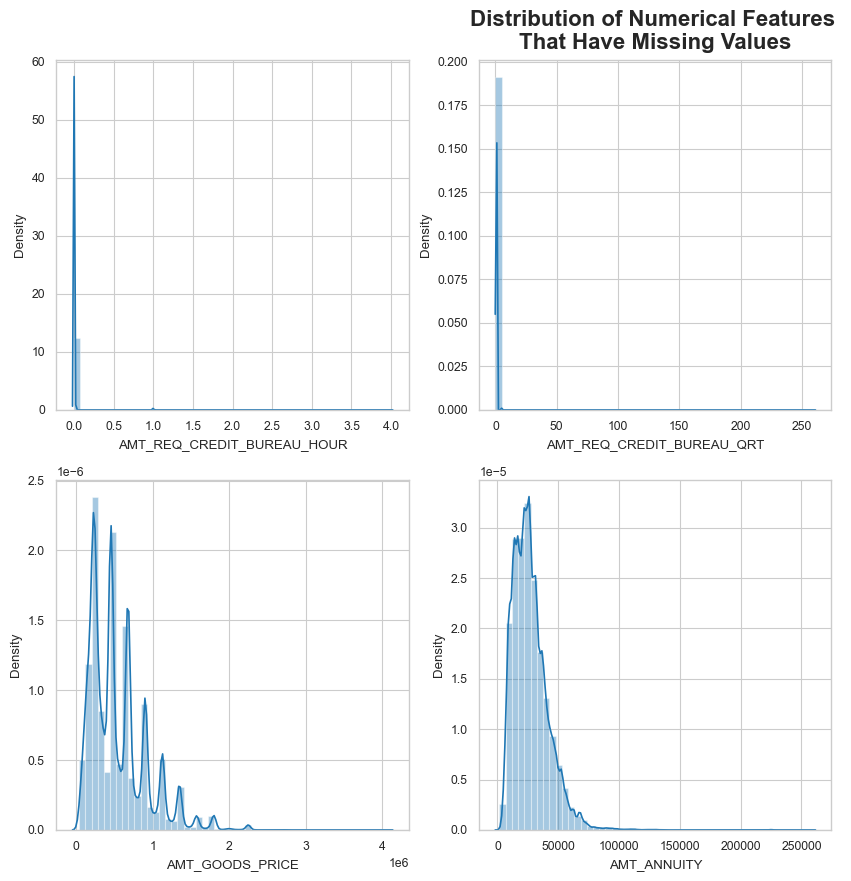

In [54]:
# Distribusi fitur numerical yang miliki null values part 2

sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dft['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[0][0])

sns.distplot(dft['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[0][1])

sns.distplot(dft['AMT_GOODS_PRICE'], ax=ax[1][0])

sns.distplot(dft['AMT_ANNUITY'], ax=ax[1][1])

plt.title('Distribution of Numerical Features \nThat Have Missing Values',loc='center',pad=310, fontsize=16, fontweight='bold')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

Text(0.5, 1.0, 'Distribution of Numerical Features \nThat Have Missing Values')

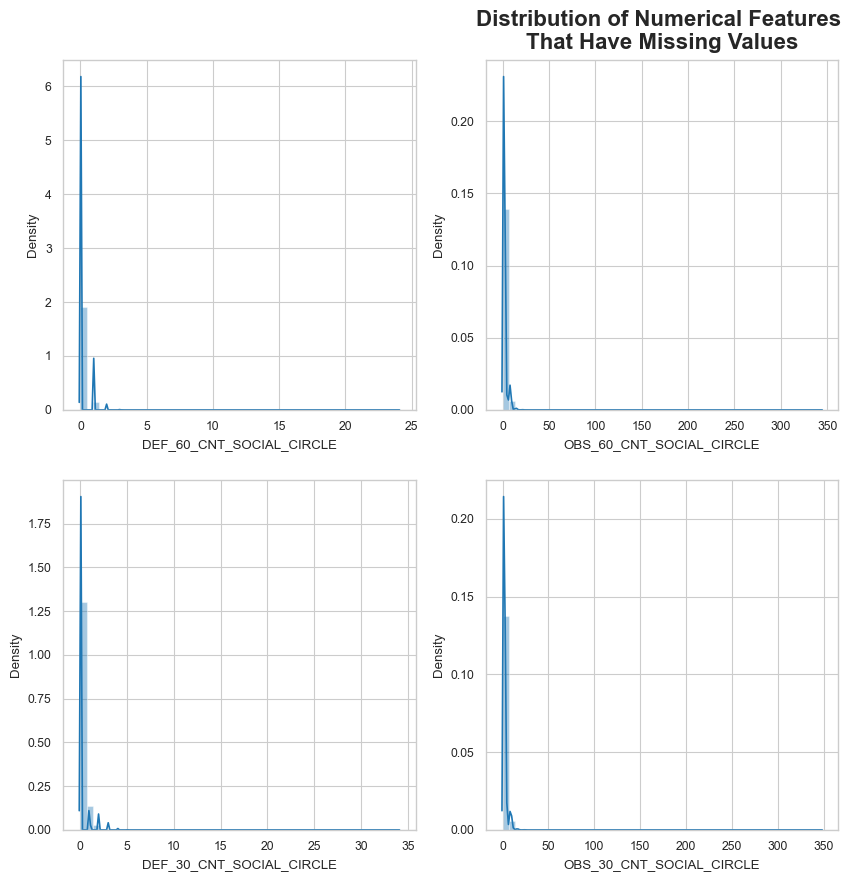

In [55]:
# Distribusi fitur numerical yang miliki null values part 3

sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dft['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(dft['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(dft['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(dft['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

plt.title('Distribution of Numerical Features \nThat Have Missing Values',loc='center',pad=310, fontsize=16, fontweight='bold')

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Numerical Features \nThat Have Missing Values')

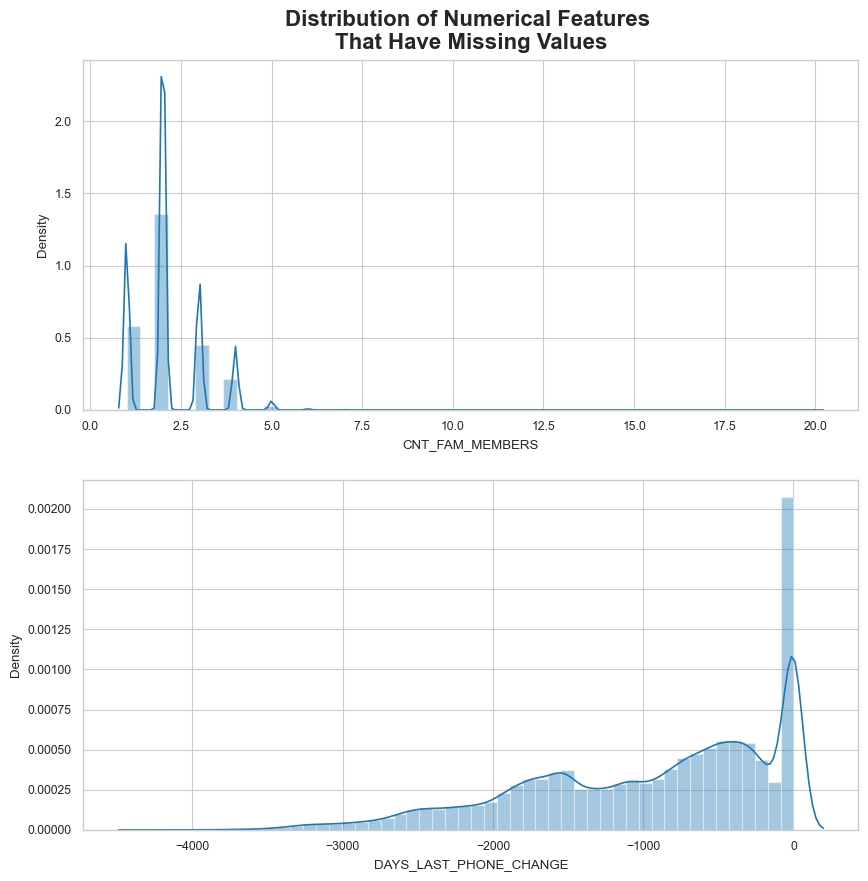

In [56]:
# Distribusi fitur numerical yang miliki null values part 4

sns.set_style('whitegrid')
fig, ax = plt.subplots(2, figsize=(10,10))
sns.set_context('paper', font_scale=1)

sns.distplot(dft['CNT_FAM_MEMBERS'], ax=ax[0])

sns.distplot(dft['DAYS_LAST_PHONE_CHANGE'], ax=ax[1])

plt.title('Distribution of Numerical Features \nThat Have Missing Values',loc='center',pad=310, fontsize=16, fontweight='bold')

- Karena fitur yang mengandung missing values banyak yang berbentuk skewed, maka pengisian datanya akan dilakukan imputasi dengan **median**
- Untuk data categorical, akan diimputasi menggunakan nilai modusnya

In [57]:
# Imputation with median to numerical features that skewed
# Imputation with mode to categorical features
category_columns = dft.select_dtypes(include=['object']).columns.tolist()
integer_columns = dft.select_dtypes(include=['int64','float64']).columns.tolist()

for column in dft:
    if dft[column].isnull().any():
        if(column in category_columns):
            dft[column]=dft[column].fillna(dft[column].mode()[0])
        else:
            dft[column]=dft[column].fillna(dft[column].median())

In [58]:
# after imputation
print('Missing values status:', dft.isnull().values.any())
print('\nThe number of missing values for each columns (after imputation): \n')
tnv = pd.DataFrame(dft.isnull().sum().sort_values(), columns=['Total Row of Null Values'])
tnv['Ratio_%'] = (tnv['Total Row of Null Values']/dft.shape[0])*100
tnv.sort_values(by=['Ratio_%'], ascending=False).reset_index()

Missing values status: False

The number of missing values for each columns (after imputation): 



,index,Total Row of Null Values,Ratio_%
0,SK_ID_CURR,0,0.0
1,REG_REGION_NOT_WORK_REGION,0,0.0
2,REGION_POPULATION_RELATIVE,0,0.0
3,AMT_INCOME_TOTAL,0,0.0
4,TARGET,0,0.0
5,NAME_CONTRACT_TYPE,0,0.0
6,CODE_GENDER,0,0.0
7,FLAG_OWN_CAR,0,0.0
8,FLAG_OWN_REALTY,0,0.0
9,CNT_CHILDREN,0,0.0


### Handling Outliers

In [59]:
# Dataset yang berupa numerical features part 1
int_features = dft[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]

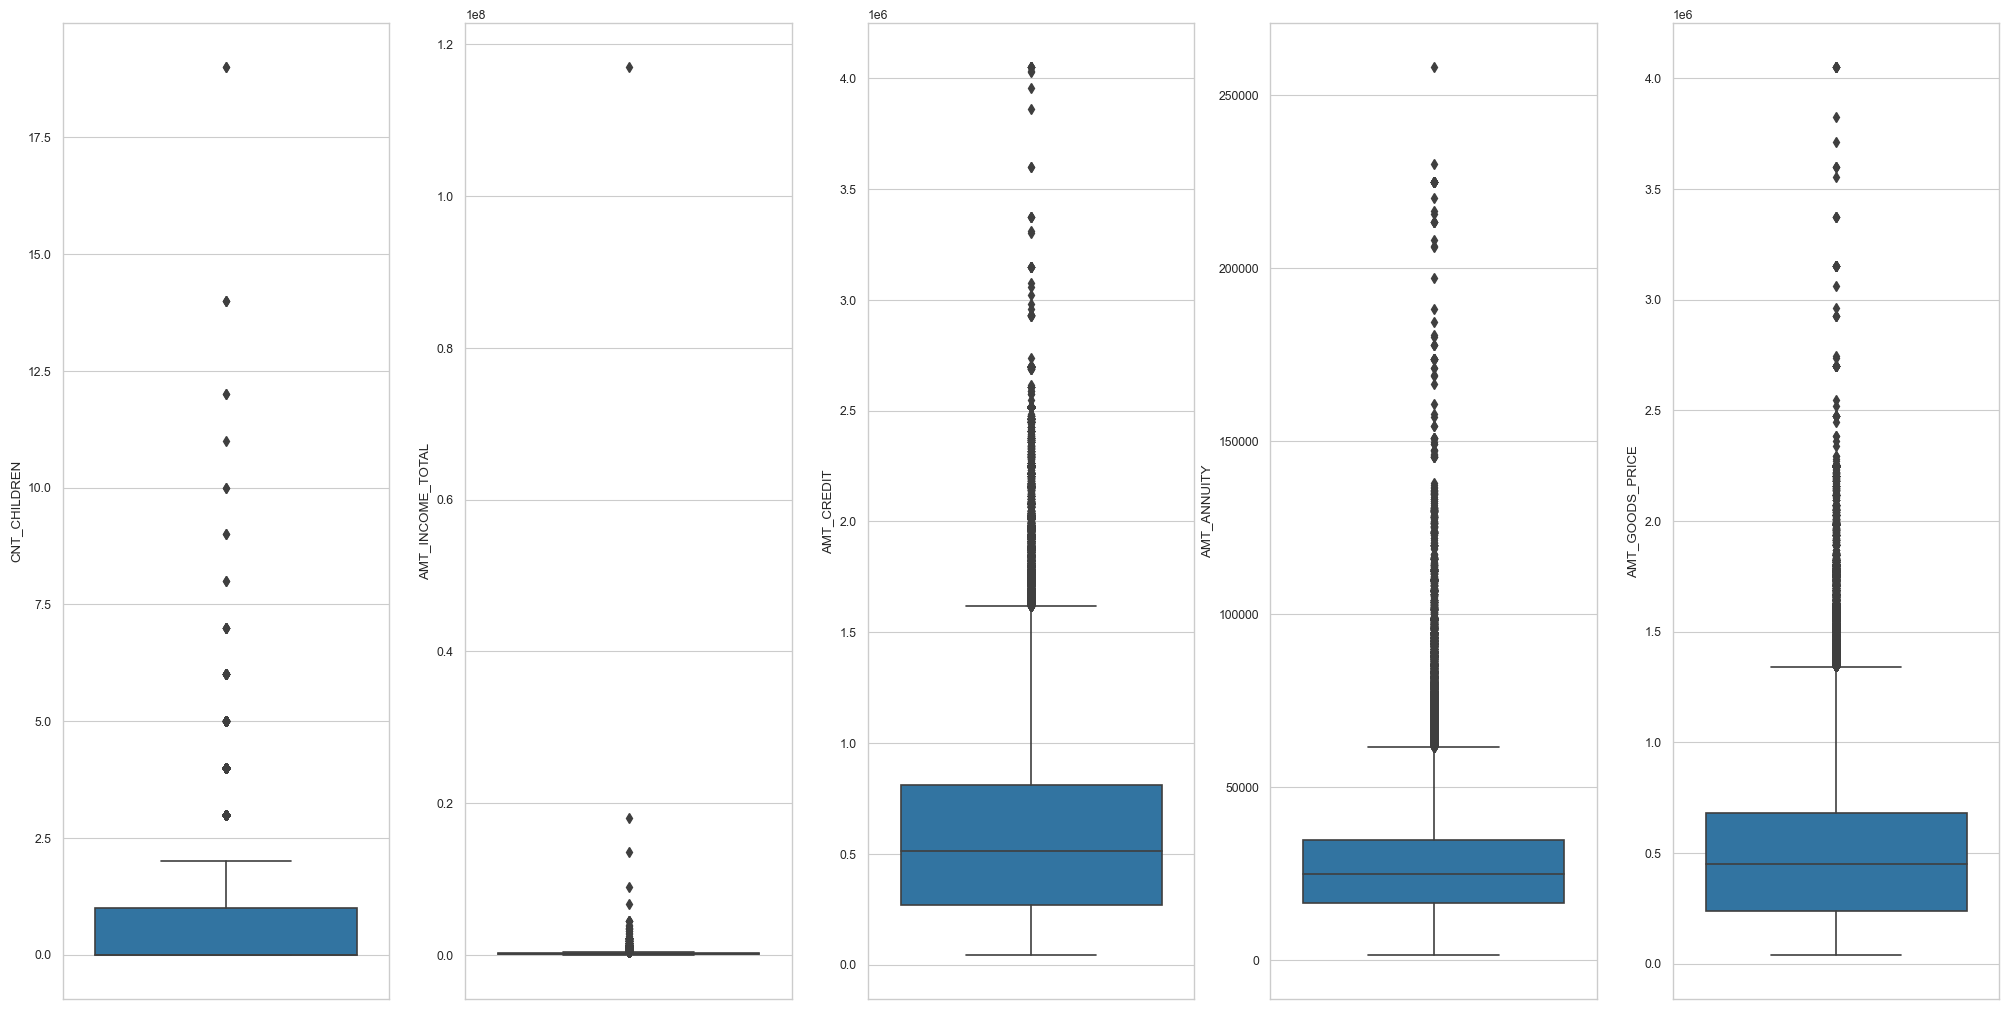

In [60]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20,10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax = axs[index])
    index += 1
    if index == 5:
        break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [61]:
# Dataset yang berupa numerical features part 2
int_features = dft[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]

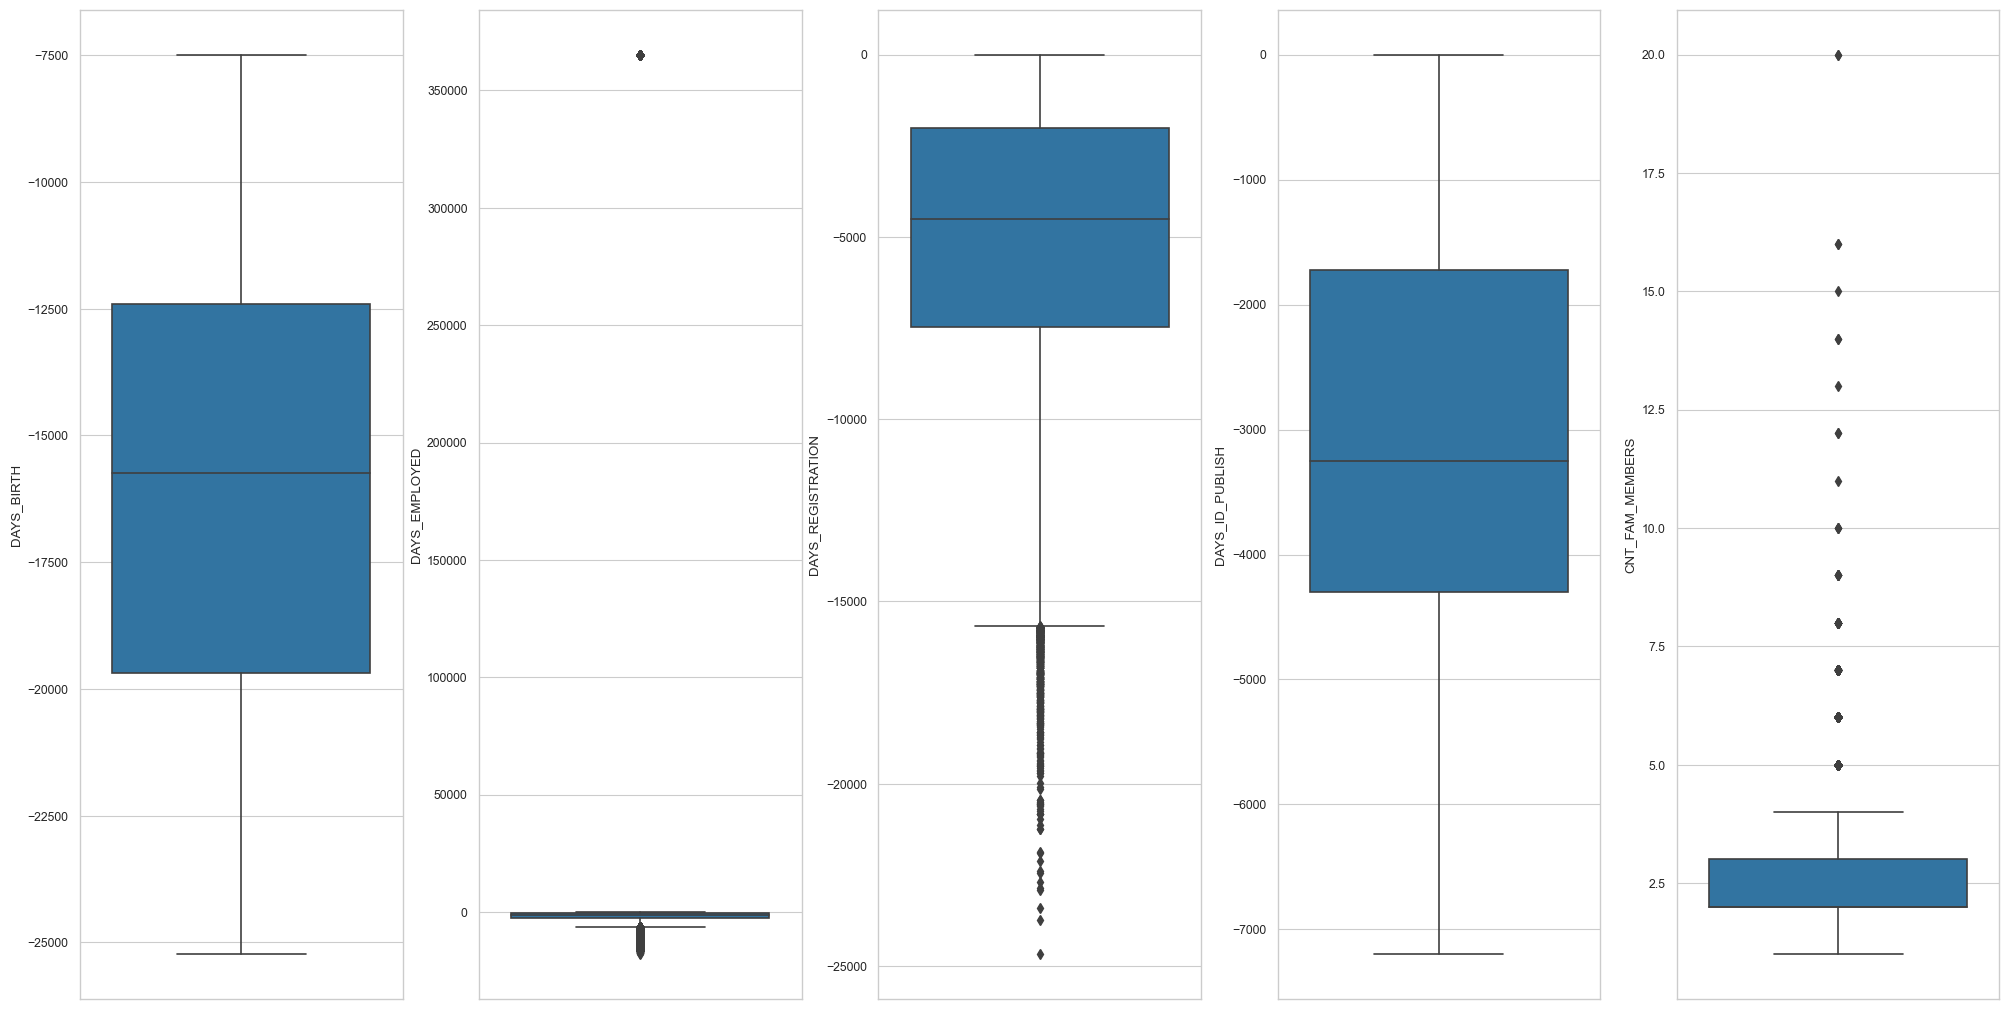

In [62]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
          break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [63]:
# Dataset yang berupa numerical features part 3
int_features = dft[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]

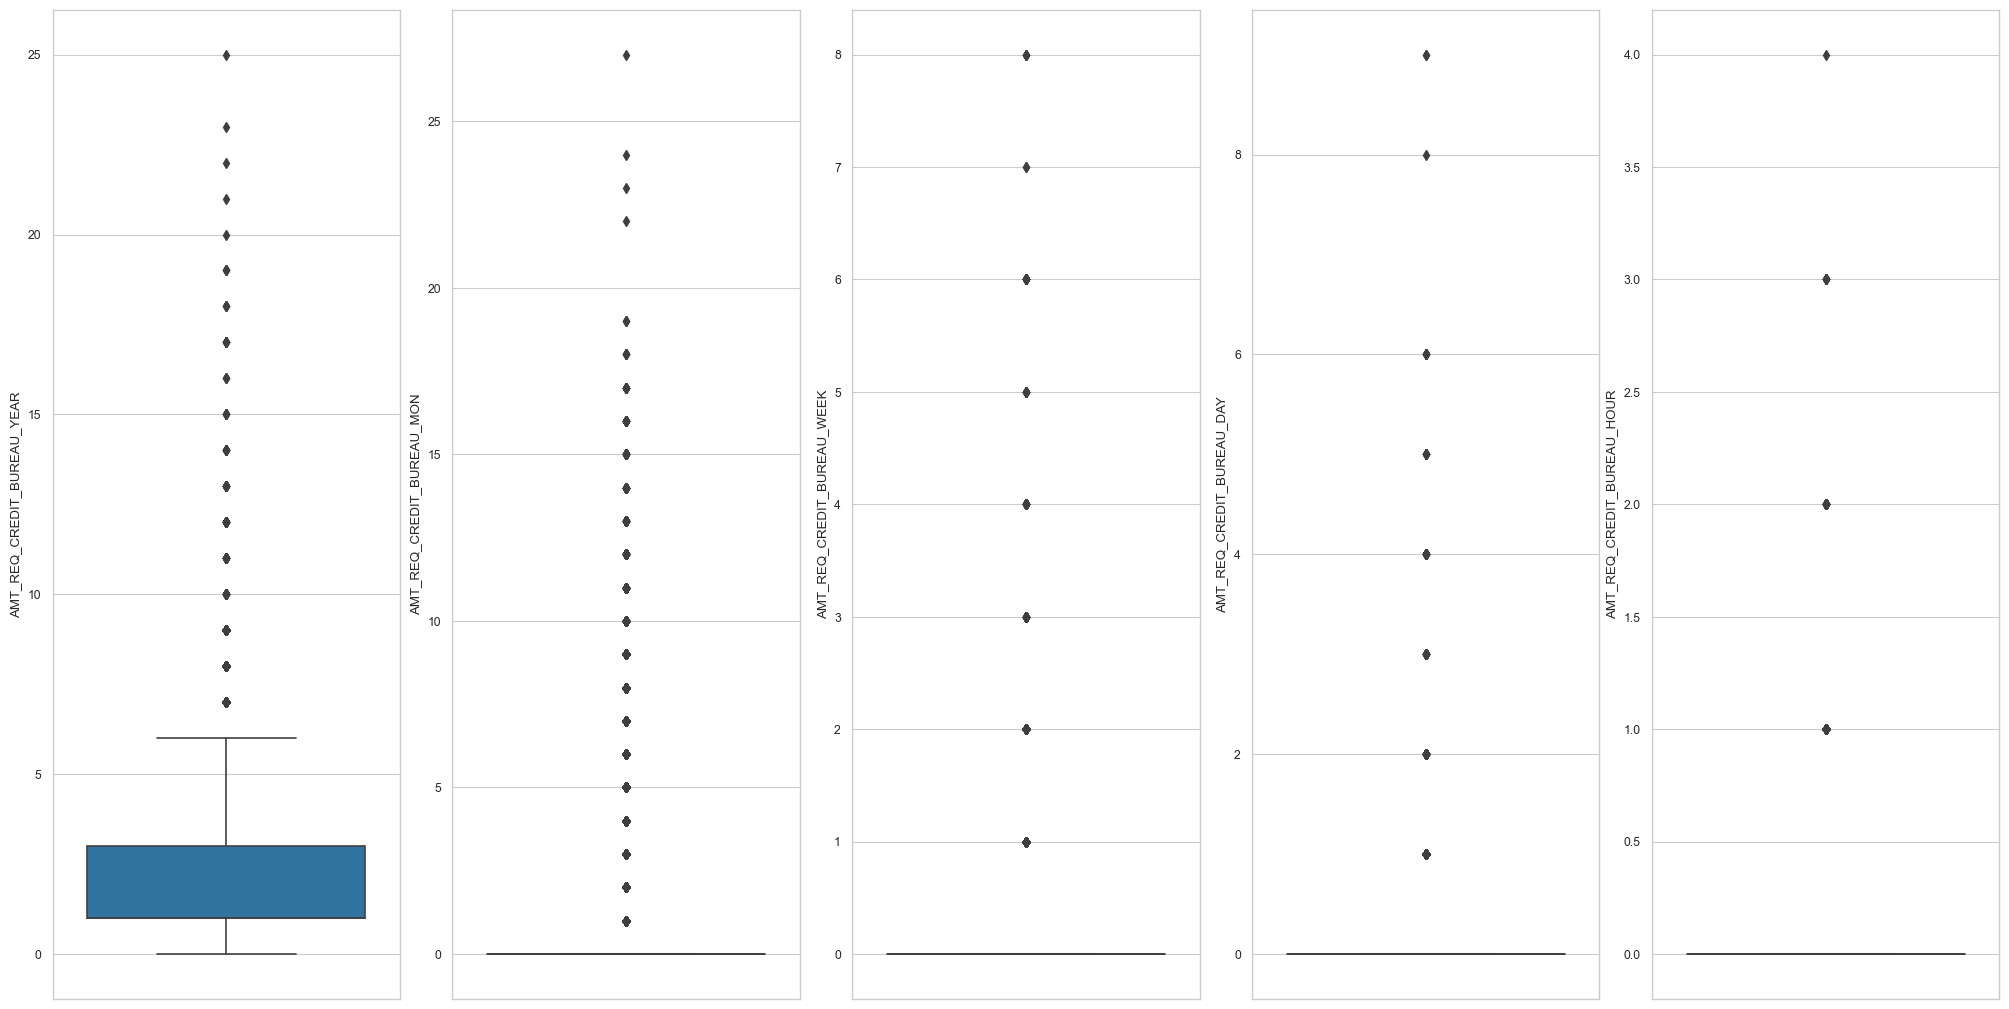

In [64]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
          break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [65]:
# Dataset yang berupa numerical features part 4
int_features = dft[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]

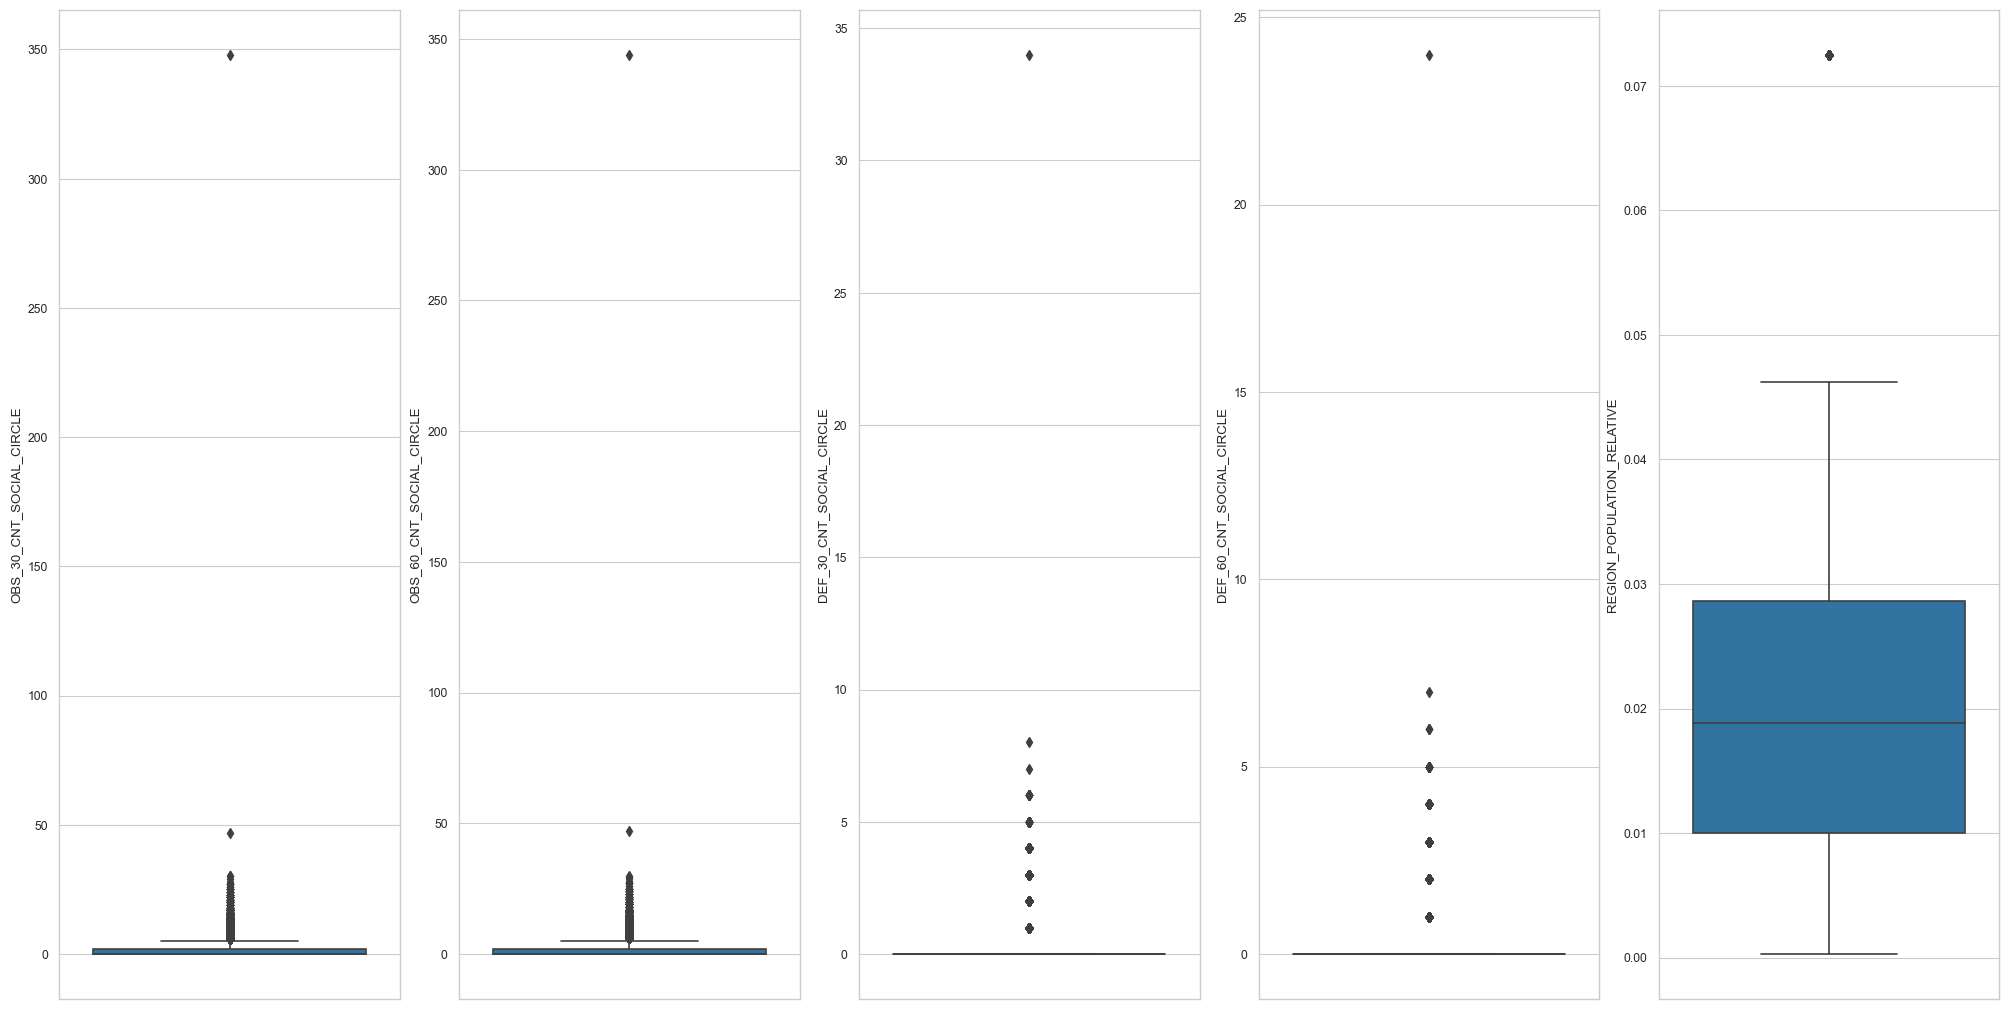

In [66]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
          break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [67]:
# Dataset yang berupa numerical features part 5
int_features = dft[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]

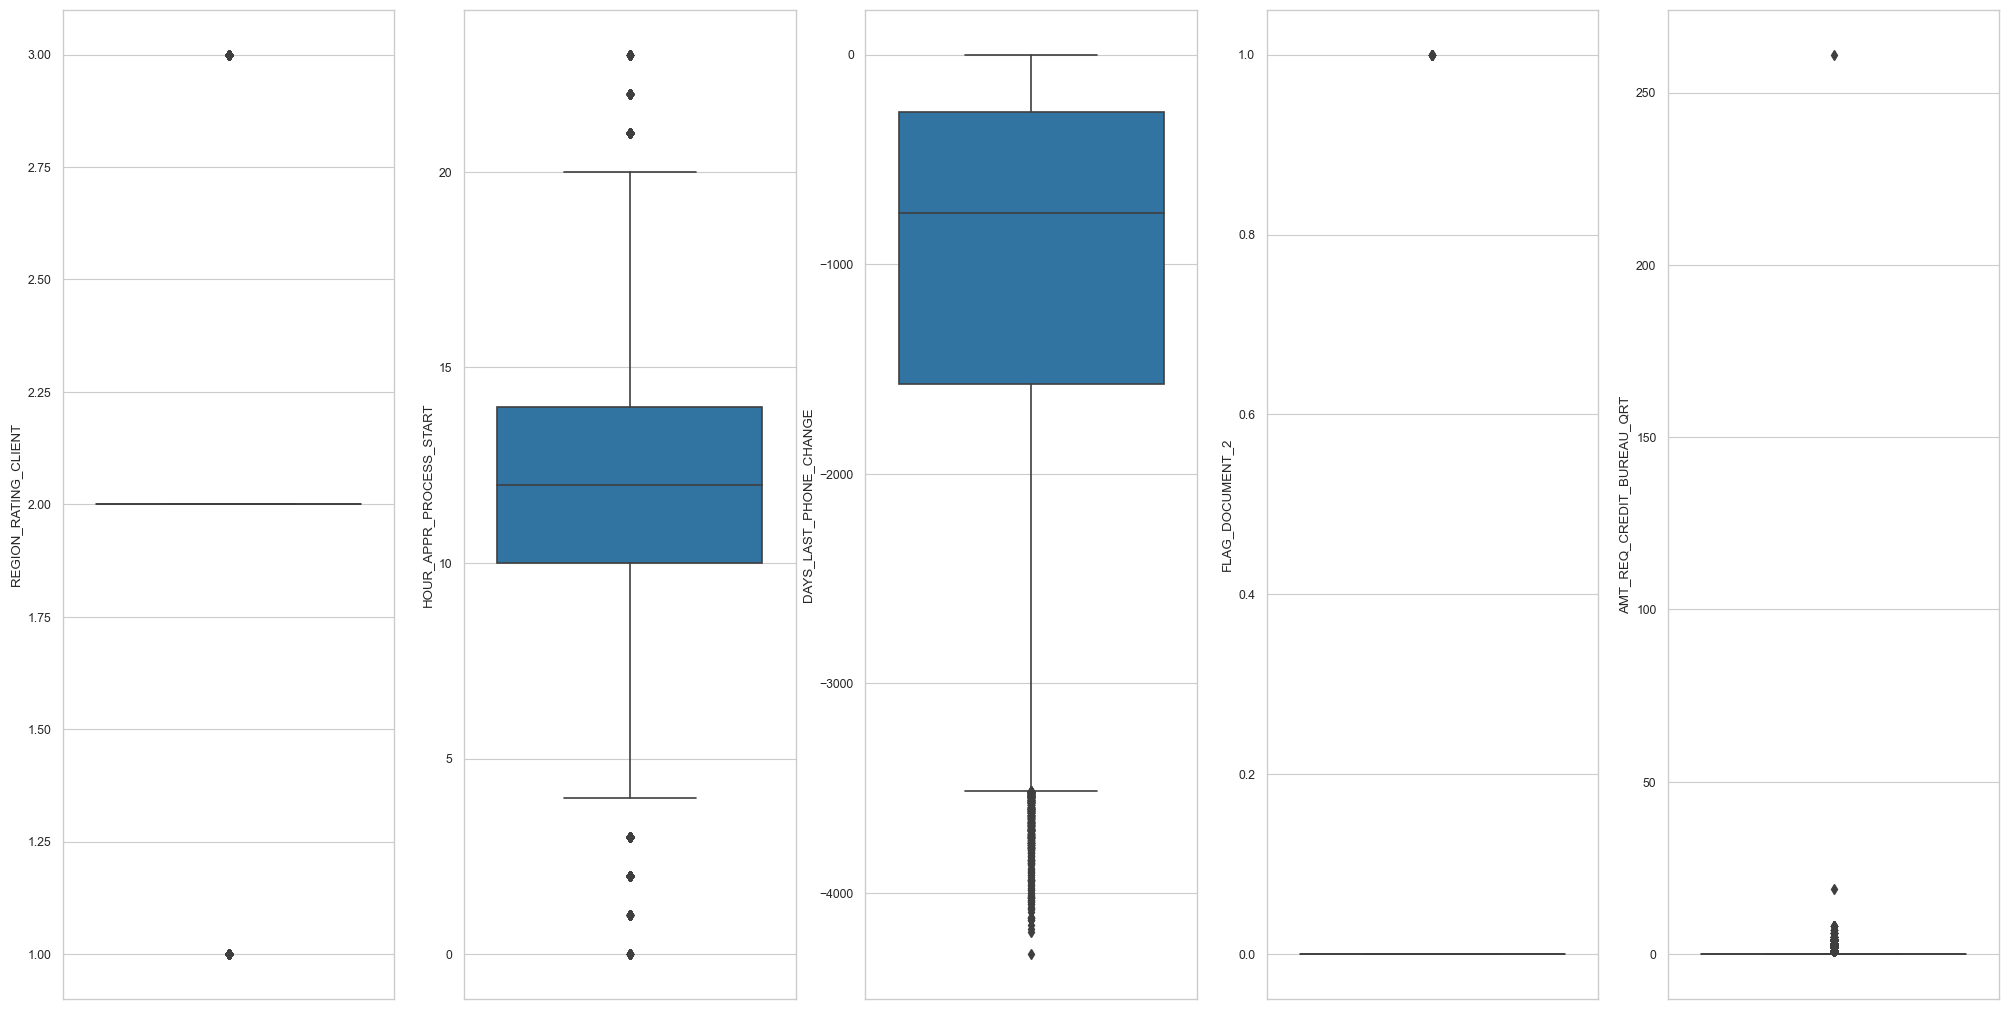

In [68]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in int_features.items():
    sns.boxplot(y = k, data = int_features, ax=axs[index])
    index += 1
    if index == 5:
          break;
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


### Feature Selection & Extraction

### Label Encoding

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
# label encoder for object features
dft_label = dft.copy()
dft_label[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = dft_label[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [71]:
dft_label.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
162588,288486,0,0,0,0,1,0,76500.0,188685.0,14944.5,157500.0,6,3,4,3,1,0.006671,-21446,365243,-7502.0,-4946,1,0,0,1,1,0,8,1.0,2,2,5,16,0,0,0,0,0,0,57,0.588700,0.535276,2.0,2.0,2.0,2.0,-244.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
274192,417812,0,0,1,1,1,3,225000.0,792000.0,31410.0,792000.0,6,7,4,1,1,0.010556,-16927,-2202,-6601.0,-463,1,1,0,1,0,0,8,5.0,3,3,0,15,0,0,0,0,0,0,42,0.497580,0.535276,1.0,1.0,1.0,1.0,-2728.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
233779,370787,0,0,0,0,1,0,117000.0,755190.0,30078.0,675000.0,4,3,4,1,1,0.004960,-17494,365243,-611.0,-1022,1,0,0,1,0,0,8,2.0,2,2,0,12,0,0,0,0,0,0,57,0.676002,0.420611,1.0,0.0,1.0,0.0,-489.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
243877,382315,0,0,1,0,1,0,144000.0,805536.0,34258.5,720000.0,6,3,4,1,1,0.011703,-22818,365243,-6268.0,-4486,1,0,0,1,1,0,8,2.0,2,2,1,13,0,0,0,0,0,0,57,0.663510,0.600658,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
267139,409510,0,0,1,0,1,0,135000.0,1506816.0,47443.5,1350000.0,6,3,1,1,1,0.025164,-17866,365243,-8217.0,-1422,1,0,0,1,0,0,8,2.0,2,2,5,9,0,0,0,0,0,0,57,0.519962,0.535276,0.0,0.0,0.0,0.0,-1978.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


In [72]:
dft_label.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  int32  
 3   CODE_GENDER                  307511 non-null  int32  
 4   FLAG_OWN_CAR                 307511 non-null  int32  
 5   FLAG_OWN_REALTY              307511 non-null  int32  
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307511 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  int32  
 12  NAME_INCOME_TYPE             307511 non-null  int32  
 13 

### Drop Unnecessary Features

In [73]:
dft_label.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [74]:
dft_label.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       307511 non-null  int64  
 1   NAME_CONTRACT_TYPE           307511 non-null  int32  
 2   CODE_GENDER                  307511 non-null  int32  
 3   FLAG_OWN_CAR                 307511 non-null  int32  
 4   FLAG_OWN_REALTY              307511 non-null  int32  
 5   CNT_CHILDREN                 307511 non-null  int64  
 6   AMT_INCOME_TOTAL             307511 non-null  float64
 7   AMT_CREDIT                   307511 non-null  float64
 8   AMT_ANNUITY                  307511 non-null  float64
 9   AMT_GOODS_PRICE              307511 non-null  float64
 10  NAME_TYPE_SUITE              307511 non-null  int32  
 11  NAME_INCOME_TYPE             307511 non-null  int32  
 12  NAME_EDUCATION_TYPE          307511 non-null  int32  
 13 

### Convert Negative Values to Positive Values
Feature yang mengandungnilai negatif akan diubah menjadi positive, diantaranya feature:
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_ID_PUBLISH
- DAYS_REGISTRATION
- DAYS_LAST_PHONE_CHANGE

In [75]:
dft_label.iloc[:,16:20] = dft_label.iloc[:,16:20].abs()
dft_label.iloc[:,45]=dft_label.iloc[:,45].abs()
dft_label.sample(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
107234,0,1,1,0,1,0,180000.0,270000.0,13500.0,270000.0,6,3,1,1,1,0.018029,23353,365243,9392.0,1477,1,0,0,1,0,0,8,2.0,3,3,6,10,0,0,0,0,0,0,57,0.621994,0.520898,0.0,0.0,0.0,0.0,995.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
35125,0,0,1,1,1,0,405000.0,2156400.0,59431.5,1800000.0,6,1,1,1,1,0.018801,11457,1659,109.0,3498,1,1,0,1,0,0,10,2.0,2,2,5,10,0,0,0,0,0,0,4,0.592934,0.597192,2.0,0.0,2.0,0.0,1274.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,3.0
290802,0,0,1,1,1,0,112500.0,1006920.0,42790.5,900000.0,6,7,4,1,5,0.005144,11788,2734,5571.0,4091,1,1,0,1,0,0,14,2.0,2,2,4,14,0,0,0,0,0,0,5,0.446933,0.535276,5.0,0.0,5.0,0.0,633.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
126541,0,0,0,1,1,0,121500.0,450000.0,35685.0,450000.0,6,7,4,1,1,0.028663,10014,1386,877.0,1931,1,1,0,1,0,0,11,2.0,2,2,6,12,0,0,0,0,0,0,30,0.599808,0.450747,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
207876,0,0,1,0,1,1,180000.0,1278000.0,37498.5,1278000.0,6,7,4,1,5,0.010006,15301,3010,3167.0,3180,1,1,0,1,0,0,8,3.0,2,2,0,10,0,0,0,1,1,0,5,0.693999,0.540654,0.0,0.0,0.0,0.0,2458.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0


In [76]:
x = dft_label.drop(['TARGET'], axis=1)
y = dft_label['TARGET']

In [77]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [78]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
16,DAYS_EMPLOYED,1.954124e+08
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
17,DAYS_REGISTRATION,1.348566e+06
44,DAYS_LAST_PHONE_CHANGE,6.656876e+05
18,DAYS_ID_PUBLISH,6.195946e+05
7,AMT_ANNUITY,3.913092e+05
37,ORGANIZATION_TYPE,4.138607e+03


### One Hot Encoding

In [80]:
dft_onehots = dft.copy()

for cats in ["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]:
    df_onehots2 = pd.get_dummies(dft_onehots[cats], prefix=cats)
    dft_onehots = dft_onehots.join(df_onehots2)
    
for i in ["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]:
    dft_onehots.drop(i, axis=1, inplace=True)
    
dft_onehots.columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       ...
       'ORGANIZATION_TYPE_Trade: type 4', 'ORGANIZATION_TYPE_Trade: type 5',
       'ORGANIZATION_TYPE_Trade: type 6', 'ORGANIZATION_TYPE_Trade: type 7',
       'ORGANIZATION_TYPE_Transport: type 1',
       'ORGANIZATION_TYPE_Transport: type 2',
       'ORGANIZATION_TYPE_Transport: type 3',
       'ORGANIZATION_TYPE_Transport: type 4', 'ORGANIZATION_TYPE_University',
       'ORGANIZATION_TYPE_XNA'],
      dtype='object', length=185)

In [81]:
dft_onehots.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 185 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    SK_ID_CURR                                         int64  
 1    TARGET                                             int64  
 2    CNT_CHILDREN                                       int64  
 3    AMT_INCOME_TOTAL                                   float64
 4    AMT_CREDIT                                         float64
 5    AMT_ANNUITY                                        float64
 6    AMT_GOODS_PRICE                                    float64
 7    REGION_POPULATION_RELATIVE                         float64
 8    DAYS_BIRTH                                         int64  
 9    DAYS_EMPLOYED                                      int64  
 10   DAYS_REGISTRATION                                  float64
 11   DAYS_ID_PUBLISH                      

In [82]:
dft_onehots.drop(['SK_ID_CURR'], inplace=True, axis=1)

In [83]:
dft_onehots.iloc[:,7:11] = dft_onehots.iloc[:,7:11].abs()
dft_onehots.iloc[:,33]=dft_onehots.iloc[:,33].abs()
dft_onehots.sample(5)

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,CODE_GENDER_Female,CODE_GENDER_Male,CODE_GENDER_XNA,NAME_CONTRACT_TYPE_Cash loans,NAME_CONTRACT_TYPE_Revolving loans,FLAG_OWN_CAR_N,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_N,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Children,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",NAME_TYPE_SUITE_Unaccompanied,NAME_INCOME_TYPE_Businessman,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,NAME_EDUCATION_TYPE_Academic degree,NAME_EDUCATION_TYPE_Higher education,NAME_EDUCATION_TYPE_Incomplete higher,NAME_EDUCATION_TYPE_Lower secondary,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Civil marriage,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Unknown,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,OCCUPATION_TYPE_Accountants,OCCUPATION_TYPE_Cleaning staff,OCCUPATION_TYPE_Cooking staff,OCCUPATION_TYPE_Core staff,OCCUPATION_TYPE_Drivers,OCCUPATION_TYPE_HR staff,OCCUPATION_TYPE_High skill tech staff,OCCUPATION_TYPE_IT staff,OCCUPATION_TYPE_Laborers,OCCUPATION_TYPE_Low-skill Laborers,OCCUPATION_TYPE_Managers,OCCUPATION_TYPE_Medicine staff,OCCUPATION_TYPE_Private service staff,OCCUPATION_TYPE_Realty agents,OCCUPATION_TYPE_Sales staff,OCCUPATION_TYPE_Secretaries,OCCUPATION_TYPE_Security staff,OCCUPATION_TYPE_Waiters/barmen staff,WEEKDAY_APPR_PROCESS_START_FRIDAY,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY,ORGANIZATION_TYPE_Advertising,ORGANIZATION_TYPE_Agriculture,ORGANIZATION_TYPE_Bank,ORGANIZATION_TYPE_Business Entity Type 1,ORGANIZATION_TYPE_Business Entity Type 2,ORGANIZATION_TYPE_Business Entity Type 3,ORGANIZATION_TYPE_Cleaning,ORGANIZATION_TYPE_Construction,ORGANIZATION_TYPE_Culture,ORGANIZATION_TYPE_Electricity,ORGANIZATION_TYPE_Emergency,ORGANIZATION_TYPE_Government,ORGANIZATION_TYPE_Hotel,ORGANIZATION_TYPE_Housing,ORGANIZATION_TYPE_Industry: type 1,ORGANIZATION_TYPE_Industry: type 10,ORGANIZATION_TYPE_Industry: type 11,ORGANIZATION_TYPE_Industry: type 12,ORGANIZATION_TYPE_Industry: type 13,ORGANIZATION_TYPE_Industry: type 2,ORGANIZATION_TYPE_Industry: type 3,ORGANIZATION_TYPE_Industry: type 4,ORGANIZATION_TYPE_Industry: type 5,ORGANIZATION_TYPE_Industry: type 6,ORGANIZATION_TYPE_Industry: type 7,ORGANIZATION_TYPE_Industry: type 8,ORGANIZATION_TYPE_Industry: type 9,ORGANIZA

In [84]:
x = dft_onehots.drop(['TARGET'], axis=1)
y = dft_onehots['TARGET']

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [86]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Features', 'Score']
print('The features that correlate well with target feature:\n')
featureScores.sort_values(by=['Score'], ascending=False)

The features that correlate well with target feature:



,Features,Score
7,DAYS_EMPLOYED,1.954124e+08
4,AMT_GOODS_PRICE,1.223080e+08
2,AMT_CREDIT,7.669987e+07
6,DAYS_BIRTH,2.235391e+06
1,AMT_INCOME_TOTAL,1.624102e+06
8,DAYS_REGISTRATION,1.348566e+06
32,DAYS_LAST_PHONE_CHANGE,6.656876e+05
9,DAYS_ID_PUBLISH,6.195946e+05
3,AMT_ANNUITY,3.913092e+05
84,NAME_EDUCATION_TYPE_Higher education,7.451081e+02


Feature yang berkorelasi dengan baik terhadap kesulitan pembayaran diantaranya:
1. **Best Features** : DAYS_EMPLOYED, AMT_GOODS_PRICE, and AMT_CREDIT
2. **Worst Features** : FLAG_MOBIL, FLAG_CONT_MOBILE, AMT_REQ_CREDIT_BUREAU_HOUR

### Handling Data Imbalance Using Label Encoding

In [79]:
from sklearn.utils import resample

In [80]:
# Membuat dua dataframe berbeda dari mayoritas dan minoritas kelas
dft_label_mayor = dft_label[(dft_label['TARGET']==0)]
dft_label_minor = dft_label[(dft_label['TARGET']==1)]

# upsample minority class
dft_label_minor_upsampled = resample(dft_label_minor, 
                                 replace=True,    # sample with replacement
                                 n_samples= 282686, # to match majority class
                                 random_state=42)  # reproducible results

# combine majority class with upsampled minority class
dft_upsampled = pd.concat([dft_label_minor_upsampled, dft_label_mayor])


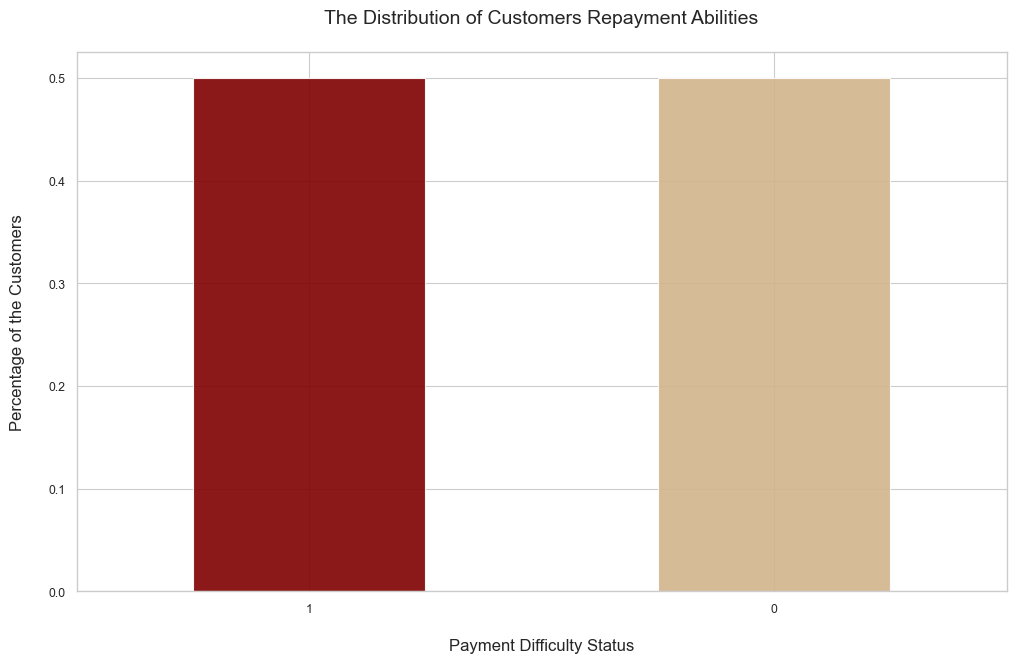

In [81]:
fig = plt.figure(figsize = (12,7))
dft_upsampled['TARGET'].value_counts(normalize=True).plot(kind='bar', color= ['maroon','tan'], alpha = 0.9, rot=0)
plt.title('The Distribution of Customers Repayment Abilities\n', fontsize=14)
plt.ylabel('Percentage of the Customers\n', fontsize=12)
plt.xlabel('\nPayment Difficulty Status', fontsize=12)
plt.show()

- Label kelas TARGET antara 0 dan 1 telah balance, sehingga bisa memasuki proses selanjutnya

### Data Splitting

In [82]:
# Mendefinisikan x dan y pada top 20 fitur
x_balanced = dft_upsampled[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = dft_upsampled['TARGET']

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(x_balanced, y_balanced, test_size = 0.2, random_state=40)
print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [85]:
from sklearn.preprocessing import StandardScaler #normalize features

In [86]:
# normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Model Building

Algoritma yang akan digunakan untuk memutuskan model terbaik yaitu :
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbor

In [87]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

### 1. Logistic Regression

In [99]:
# Train model
LR = LogisticRegression().fit(X_train, y_train)
print(LR)

LogisticRegression()


In [103]:
# Predict data training
y_train_pred_log = LR.predict(X_train)
print(classification_report(y_train, y_train_pred_log))

              precision    recall  f1-score   support

           0       0.67      0.68      0.68    226280
           1       0.68      0.66      0.67    226017

    accuracy                           0.67    452297
   macro avg       0.67      0.67      0.67    452297
weighted avg       0.67      0.67      0.67    452297



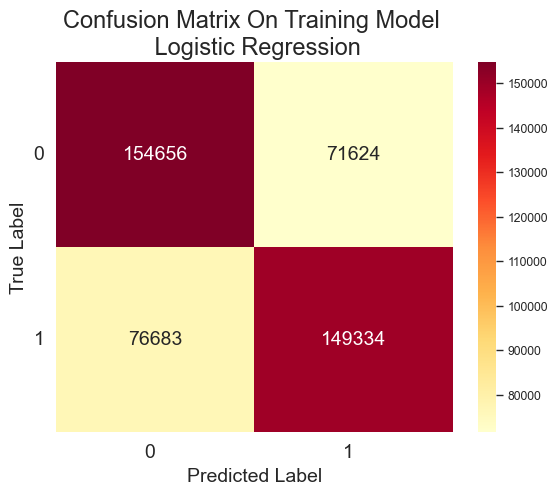

In [107]:
# form confusion matrix as a dataframe
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_train, y_train_pred_log)), ('0', '1'), ('0','1'))

# plot confusion matrix 
plt.figure()
heat_map = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heat_map.yaxis.set_ticklabels(heat_map.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heat_map.xaxis.set_ticklabels(heat_map.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix On Training Model \n Logistic Regression', fontsize=17)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [109]:
# predict data test
y_test_pred_log = LR.predict(X_test)

# print classitifaction report
print(classification_report(y_test, y_test_pred_log))

              precision    recall  f1-score   support

           0       0.67      0.69      0.68     56406
           1       0.68      0.66      0.67     56669

    accuracy                           0.67    113075
   macro avg       0.67      0.67      0.67    113075
weighted avg       0.67      0.67      0.67    113075



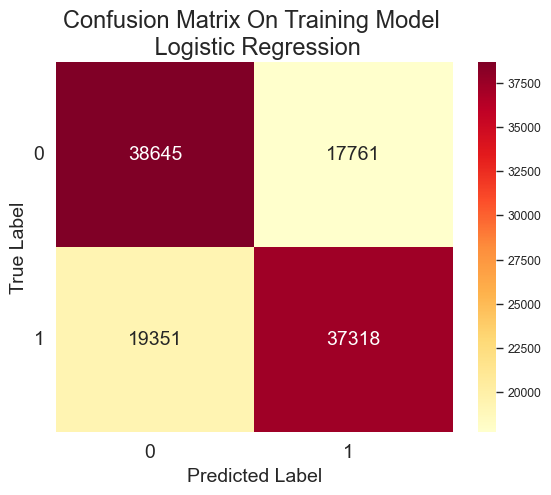

In [110]:
# form confusion matrix as a dataframe
confusion_matrix_log = pd.DataFrame((confusion_matrix(y_test, y_test_pred_log)), ('0', '1'), ('0','1'))

# plot confusion matrix 
plt.figure()
heat_map = sns.heatmap(confusion_matrix_log, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlOrRd')
heat_map.yaxis.set_ticklabels(heat_map.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heat_map.xaxis.set_ticklabels(heat_map.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix On Training Model \n Logistic Regression', fontsize=17)
plt.ylabel('True Label', fontsize=14)
plt.xlabel('Predicted Label', fontsize=14)
plt.show()

In [112]:
acc_log_train=round(LR.score(X_train,y_train)*100,2)
acc_log_test=round(LR.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_log_train))
print("Test Accuracy: % {}".format(acc_log_test))

Training Accuracy: % 67.21
Test Accuracy: % 67.18


- Pada model **Logistic Regression** memberikan hasil akurasi 67.13% 

In [113]:
# ROC scores
roc_auc_log = round(roc_auc_score(y_test, y_test_pred_log),4)
print('ROC AUC:', roc_auc_log)

ROC AUC: 0.6718


### 2. Decision Tree

In [128]:
dec_t = DecisionTreeClassifier().fit(X_train,y_train)
print(dec_t)

DecisionTreeClassifier()


In [131]:
# predict data train
y_train_pred_dt = dec_t.predict(X_train)

# classification report
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226280
           1       1.00      1.00      1.00    226017

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



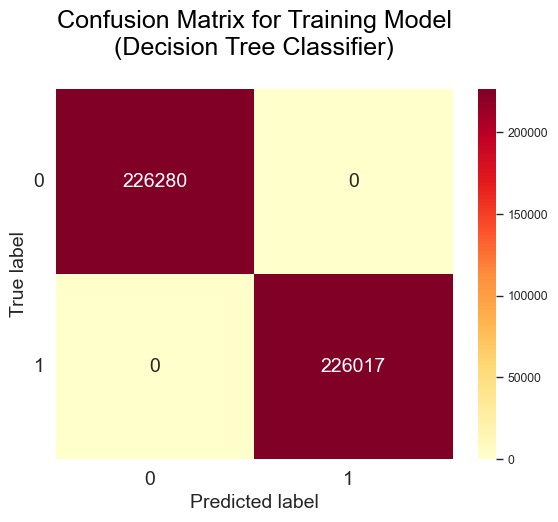

In [133]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('0', '1'), ('0', '1'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [135]:
# predict data test
y_test_pred_dt = dec_t.predict(X_test)

# print classification report
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     56406
           1       0.90      0.84      0.87     56669

    accuracy                           0.87    113075
   macro avg       0.87      0.87      0.87    113075
weighted avg       0.87      0.87      0.87    113075



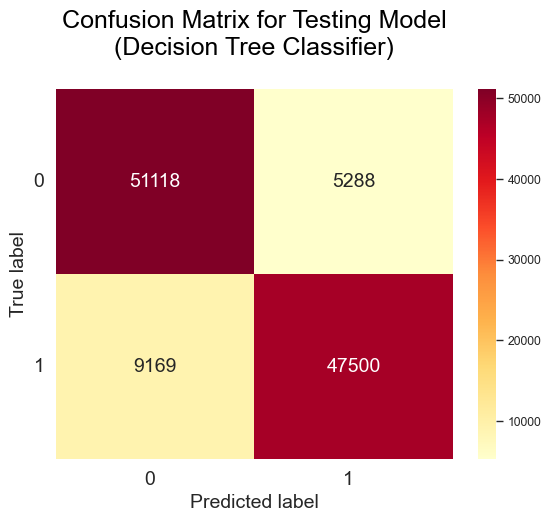

In [137]:
# form confusion matrix as a dataFrame
confusion_matrix_dt = pd.DataFrame((confusion_matrix(y_test, y_test_pred_dt)), ('0', '1'), ('0', '1'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_dt, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Decision Tree Classifier)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [138]:
acc_dect_train = round(dec_t.score(X_train, y_train)*100,2)
acc_dect_test = round(dec_t.score(X_test,y_test)*100,2)
print("Training Accuracy: %{}".format(acc_dect_train))
print("Test Accuracy: %{}".format(acc_dect_test))

Training Accuracy: %100.0
Test Accuracy: %87.21


Pada model **Decision Tree** diperoleh akurasi pada data train sebesar 100%,
sedangkan pada data test nilai akurasinya mencapai 87.21%

In [140]:
# ROC_scores
roc_auc_dect = round(roc_auc_score(y_test, y_test_pred_dt),4)
print('ROC AUC: ', roc_auc_dect)

ROC AUC:  0.8722


### 3. Random Forest

In [125]:
# train model
RF_model = RandomForestClassifier().fit(X_train,y_train)
print(RF_model)

RandomForestClassifier()


In [142]:
# predict data train
y_train_pred_dt = RF_model.predict(X_train)

# print classification report
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226280
           1       1.00      1.00      1.00    226017

    accuracy                           1.00    452297
   macro avg       1.00      1.00      1.00    452297
weighted avg       1.00      1.00      1.00    452297



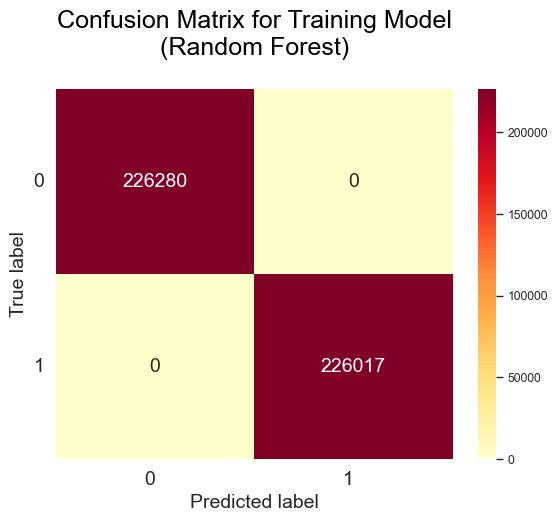

In [144]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_train, y_train_pred_dt)), ('0', '1'), ('0', '1'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [145]:
# predict data test
y_test_pred_rf = RF_model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report

# print classification report
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56406
           1       0.99      1.00      1.00     56669

    accuracy                           1.00    113075
   macro avg       1.00      1.00      1.00    113075
weighted avg       1.00      1.00      1.00    113075



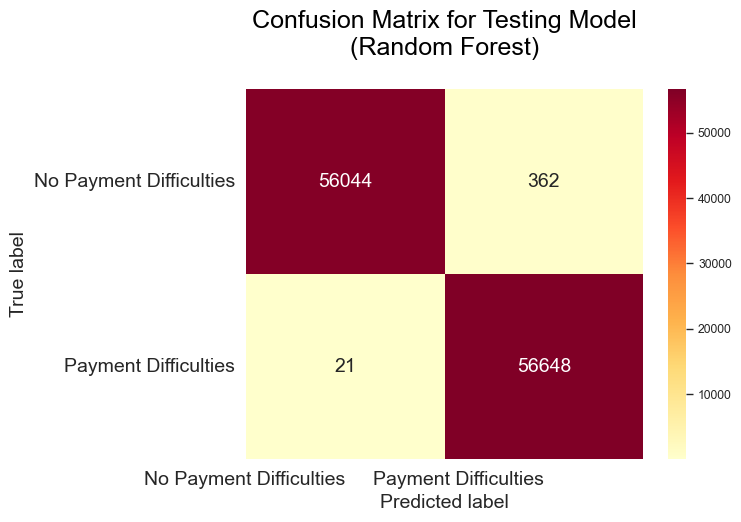

In [146]:
# form confusion matrix as a dataFrame
confusion_matrix_rf = pd.DataFrame((confusion_matrix(y_test, y_test_pred_rf)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_rf, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(Random Forest)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [147]:
acc_rf_train=round(RF_model.score(X_train,y_train)*100,2)
acc_rf_test=round(RF_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_rf_train))
print("Test Accuracy: % {}".format(acc_rf_test))

Training Accuracy: % 100.0
Test Accuracy: % 99.66


Dengan model Random Forest, akurasi data training mencapai 100% dan akurasi data test mencapai 99.66%. Terlihat tidak mengalami overfitting 

In [148]:
# ROC scores
roc_auc_rf = round(roc_auc_score(y_test, y_test_pred_rf),4)
print('ROC AUC:', roc_auc_rf)

ROC AUC: 0.9966


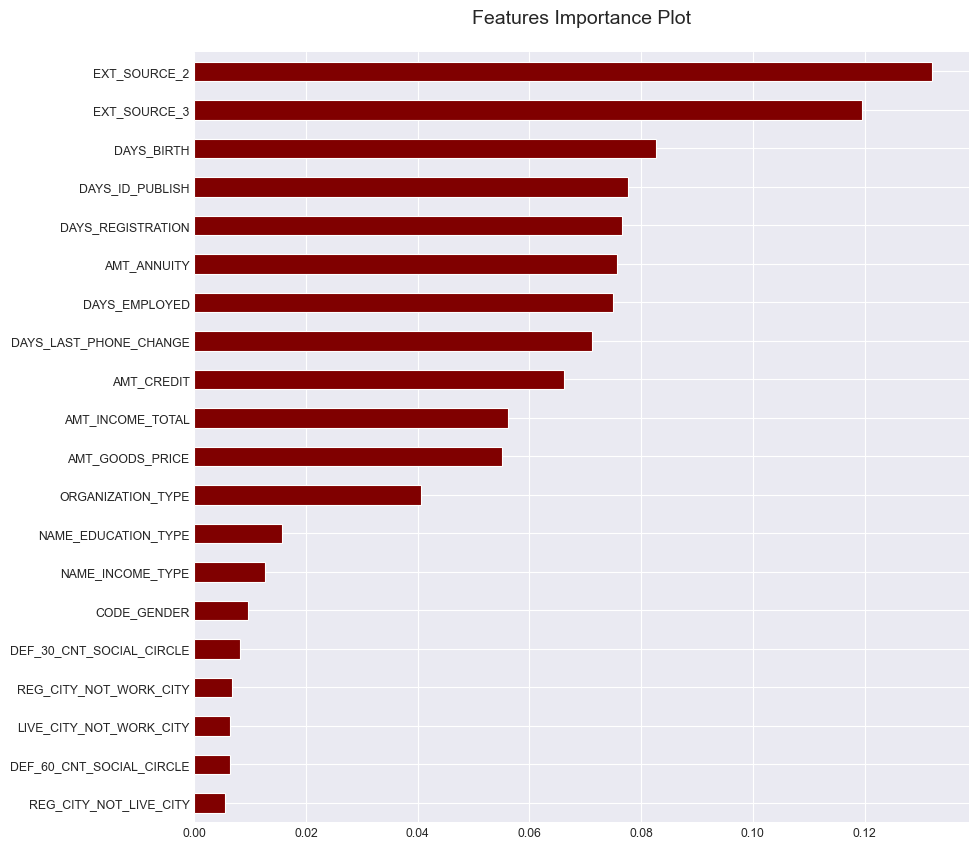

In [151]:
# important features
importances_rf = pd.Series(RF_model.feature_importances_, index=x_balanced.columns).sort_values(ascending=True)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(10,10))
fig = importances_rf.plot(kind ='barh', color ='maroon')
plt.title('Features Importance Plot\n', fontsize=14)
plt.show()

fig.figure.tight_layout()
fig.figure.savefig('top feature.png')


**Feature Impotances** dari model Random Forest diperoleh 5 fitur terpenting adalah:
EXT_SOURCE_2, EXT_SOURCE_3, DAYS_BIRTH, DAYS_ID_PUBLISH, DAYS_REGISTRATION

### 4. K-Nearest Neighbor

In [89]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)

KNeighborsClassifier()


In [90]:
# predit data train
y_train_pred_knn = knn_model.predict(X_train)

# print classification report
print(classification_report(y_train, y_train_pred_knn))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91    226280
           1       0.86      1.00      0.92    226017

    accuracy                           0.92    452297
   macro avg       0.93      0.92      0.92    452297
weighted avg       0.93      0.92      0.92    452297



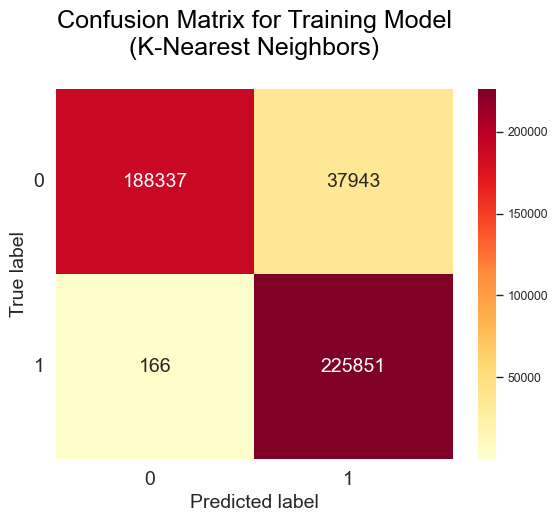

In [91]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_train, y_train_pred_knn)), ('0', '1'), ('0', '1'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Training Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [92]:
# predit data test
y_test_pred_knn = knn_model.predict(X_test)

# print classification report
print(classification_report(y_test, y_test_pred_knn))

              precision    recall  f1-score   support

           0       0.99      0.76      0.86     56406
           1       0.81      1.00      0.89     56669

    accuracy                           0.88    113075
   macro avg       0.90      0.88      0.88    113075
weighted avg       0.90      0.88      0.88    113075



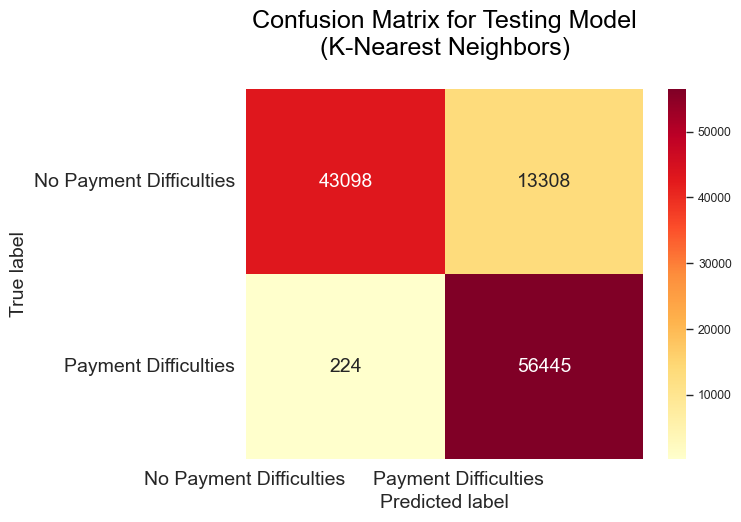

In [94]:
# form confusion matrix as a dataFrame
confusion_matrix_knn = pd.DataFrame((confusion_matrix(y_test, y_test_pred_knn)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_knn, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlOrRd')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model\n(K-Nearest Neighbors)\n', fontsize=18, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [95]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: % {}".format(acc_knn_train))
print("Test Accuracy: % {}".format(acc_knn_test))

Training Accuracy: % 91.57
Test Accuracy: % 88.03


Pada model KNN, diperoleh akurasi pelatihan mencapai 91.57% serta akurasi tes model mencapai 88.03%

In [96]:
# ROC scores
roc_auc_knn = round(roc_auc_score(y_test, y_test_pred_knn),4)
print('ROC AUC:', roc_auc_knn)

ROC AUC: 0.8801


### Model Selection

In [105]:
result_pred = pd.DataFrame([["Logistic Regression", 0.6721, 0.6718, 0.6718],
                            ["Decision Tree", 1.0000, 0.8721, 0.8722],
                            ["Random Forest", 1.0000, 0.9966, 0.9966],
                            ["K-Nearest Neighbor", 0.9157, 0.8803, 0.8801]],
                           columns = ["Models", "Training Accuracy Score", "Testing Accuracy Score", "ROC Score"])


result_pred.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=False).style.background_gradient(cmap='Pastel1')

,Models,Training Accuracy Score,Testing Accuracy Score,ROC Score
2,Random Forest,1.000000,0.996600,0.996600
1,Decision Tree,1.000000,0.872100,0.872200
3,K-Nearest Neighbor,0.915700,0.880300,0.880100
0,Logistic Regression,0.672100,0.671800,0.671800


Akurasi prediksi dari data train dan test menunjukkan bahwa model **Random Forest** memiliki nilai yang tidak berbeda signifikan, sehingga bisa dikatakan bahwa model tersebut sangat baik untuk pengujian selanjutnya karna tidak menunjukkan adanya overfitting atau underfitting. Jadi, Random Forest akan dipilih untuk menguji data tes kemampuan pembayaran kredit customer.

### Prediction

#### Import Dataset Tes

In [106]:
dftest = pd.read_csv("application_test.csv", sep=',')
dftest.shape

(48744, 121)

In [107]:
dftest.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
647,104480,Cash loans,M,Y,Y,1,450000.0,758214.0,38844.0,603000.0,Family,Commercial associate,Higher education,Married,House / apartment,0.046220,-15614,-2702,-896.0,-2713,7.0,1,1,0,1,0,1,Managers,3.0,1,1,TUESDAY,10,0,0,0,1,1,1,Self-employed,0.519561,0.747367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,3.0,0.0,-546.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
15463,211548,Cash loans,F,N,N,0,157500.0,119893.5,14355.0,103500.0,Unaccompanied,Working,Higher education,Civil marriage,House / apartment,0.018029,-9538,-888,-2204.0,-2216,NaN,1,1,0,1,0,0,Laborers,2.0,3,3,MONDAY,10,0,0,0,1,1,0,Police,0.280099,0.227474,0.234015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-1983.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
10692,177700,Cash loans,F,N,Y,0,157500.0,281673.0,33426.0,261000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.025164,-18380,-2266,-11363.0,-1915,NaN,1,1,0,1,0,0,Accountants,2.0,2,2,FRIDAY,14,0,0,0,0,0,0,School,NaN,0.282468,NaN,0.0825,0.0805,0.9752,0.66,0.0079,NaN,0.1379,0.1667,NaN,0.0157,NaN,0.0703,NaN,0.0000,0.0840,0.0836,0.9752,0.6733,0.008,NaN,0.1379,0.1667,NaN,0.0161,NaN,0.0732,NaN,0.0000,0.0833,0.0805,0.9752,0.6645,0.008,NaN,0.1379,0.1667,NaN,0.0160,NaN,0.0715,NaN,0.0000,reg oper account,block of flats,0.0553,Panel,No,5.0,0.0,5.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,2.0
31650,330188,Cash loans,F,N,Y,0,81000.0,364428.0,15448.5,238500.0,Unaccompanied,Commercial a

### Data Preprocessing

#### Handling Duplicate Data

In [108]:
dftest.duplicated().sum()

0

#### Handling Missing Values

In [110]:
print('Missing values status:', dftest.isnull().values.any())
tvc = pd.DataFrame(dftest.isnull().sum(), columns=['Total Row of Null Values'])
tvc['Ratio_%'] = (tvc['Total Row of Null Values']/dftest.shape[0])*100
tvc.sort_values(by=['Ratio_%'], ascending=False).reset_index()

Missing values status: True


,index,Total Row of Null Values,Ratio_%
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
5,NONLIVINGAPARTMENTS_MEDI,33347,68.412523
6,FONDKAPREMONT_MODE,32797,67.284179
7,LIVINGAPARTMENTS_AVG,32780,67.249302
8,LIVINGAPARTMENTS_MODE,32780,67.249302
9,LIVINGAPARTMENTS_MEDI,32780,67.249302


In [111]:
# Melakukan drop fitur yang mengandung missing values > 50%
dftest.drop(dftest.iloc[:, 43:90], inplace=True, axis=1)
dftest.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], inplace=True, axis=1)

In [112]:
# Setelah drop beberapa fitur
tvc = pd.DataFrame(dftest.isnull().sum(), columns=['Total Row of Null Values'])
tvc['Ratio_%'] = (tvc['Total Row of Null Values']/dftest.shape[0])*100
tvc.sort_values(by=['Ratio_%'], ascending=False).reset_index()

,index,Total Row of Null Values,Ratio_%
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
5,AMT_REQ_CREDIT_BUREAU_WEEK,6049,12.409732
6,AMT_REQ_CREDIT_BUREAU_DAY,6049,12.409732
7,AMT_REQ_CREDIT_BUREAU_HOUR,6049,12.409732
8,NAME_TYPE_SUITE,911,1.868948
9,OBS_30_CNT_SOCIAL_CIRCLE,29,0.059495


In [117]:
# impute missin values pada numerical feature menggunakan median karena skewed
# impute missing values pada categorical feature menggunakan nilai modus

category_columns = dftest.select_dtypes(include=['object']).columns.tolist()
integer_columns = dftest.select_dtypes(include=['int64','float64']).columns.tolist()

for column in dftest:
    if dftest[column].isnull().any():
        if(column in category_columns):
            dftest[column]=dftest[column].fillna(dftest[column].mode()[0])
        else:
            dftest[column]=dftest[column].fillna(dftest[column].median())

In [118]:
# setelah imputasi
print('Missing values status:', dftest.isnull().values.any())
tvc = pd.DataFrame(dftest.isnull().sum(), columns=['Total Row of Null Values'])
tvc['Ratio_%'] = (tvc['Total Row of Null Values']/dftest.shape[0])*100
tvc.sort_values(by=['Ratio_%'], ascending=False).reset_index()

Missing values status: False


,index,Total Row of Null Values,Ratio_%
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
5,FLAG_DOCUMENT_5,0,0.0
6,FLAG_DOCUMENT_4,0,0.0
7,FLAG_DOCUMENT_3,0,0.0
8,FLAG_DOCUMENT_2,0,0.0
9,DAYS_LAST_PHONE_CHANGE,0,0.0


#### Label Encoding

In [120]:
# label encoder for object features
dftest[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = dftest[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

In [122]:
dftest.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
38138,379509,0,0,0,0,1,157500.0,450000.0,22977.0,450000.0,6,6,4,3,1,0.009549,-11389,-2002,-5488.0,-4017,1,1,1,1,0,0,14,2.0,2,2,4,19,0,0,0,0,0,0,42,0.656295,0.239226,1.0,0.0,1.0,0.0,-1608.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,4.0
31650,330188,0,0,0,1,0,81000.0,364428.0,15448.5,238500.0,6,1,4,1,2,0.025164,-19224,-8056,-3090.0,-2628,1,1,0,1,0,0,3,2.0,2,2,0,13,0,0,0,0,0,0,1,0.010873,0.773896,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,6.0
39446,390558,0,1,1,1,0,157500.0,274500.0,13333.5,274500.0,6,2,1,4,1,0.018634,-23737,365243,-1728.0,-4383,1,0,0,1,0,0,8,1.0,2,2,5,11,0,0,0,1,0,0,57,0.144301,0.358951,2.0,0.0,2.0,0.0,-861.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
36467,366845,0,1,1,1,0,90000.0,189621.0,15111.0,144000.0,6,6,4,3,1,0.030755,-9774,-539,-4360.0,-2209,1,1,0,1,0,0,14,1.0,2,2,6,12,0,0,0,0,1,1,5,0.018981,0.643026,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
26427,292347,0,1,1,1,1,180000.0,276903.0,20830.5,247500.0,5,6,4,1,1,0.031329,-15394,-1184,-3228.0,-4412,1,1,0,1,0,0,8,3.0,2,2,0,9,0,0,0,0,0,0,5,0.629333,0.576209,7.0,0.0,7.0,0.0,-1983.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0


#### Convert Negative Values to Positive Values

Fitur yang mengandung nilai negatif yaitu:
- DAYS_BIRTH
- DAYS_EMPLOYED
- DAYS_ID_PUBLISH
- DAYS_REGISTRATION
- DAYS_LAST_PHONE_CHANGE

In [123]:
dftest.iloc[:,16:20] = dftest.iloc[:,16:20].abs()
dftest.iloc[:,45] = dftest.iloc[:,45].abs()

#### Prediction

Memprediksi kemampuan customer dalam pembayaran kredit menggunakan model machine learning - **Random Forest**

In [124]:
pred_test = dftest[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]

pred_test.sample(5)

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
22039,1563,382500.0,511249.5,13763,144000.0,3167.0,311.0,4290,26230.5,42,6,0,0,0.350467,0,4,1.0,0.519097,1.0,0
47287,1518,126000.0,126000.0,13639,112500.0,1668.0,2263.0,5447,10233.0,39,1,0,0,0.434456,0,4,0.0,0.542445,0.0,0
47698,6509,315000.0,356580.0,14830,427500.0,2547.0,202.0,364,37570.5,31,3,1,1,0.679122,0,1,0.0,0.644679,0.0,1
1975,2673,477000.0,552555.0,23047,283500.0,2382.0,2271.0,5888,28341.0,52,6,0,1,0.625540,0,1,0.0,0.574447,0.0,0
34726,4711,90000.0,90000.0,14215,90000.0,997.0,1280.0,4598,9580.5,4,6,0,0,0.670373,0,4,0.0,0.119878,0.0,0


In [129]:
# Predicting
predict = pd.Series(RF_model.predict(pred_test), name = "TARGET").astype(int)
results = pd.concat([dftest['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

C:\Users\asus\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,0
1,100005,0
2,100013,0
3,100028,0
4,100038,0


### Recommendation

1. Membuat golongan **Nasabah Prioritas Utama** untuk campaign ataupun pemberian kredit
- Memiliki pendapatan setiap bulannya karena dia adalah businessman, student, pensioner 
- Memiliki pendidikan terakhir di **Academic Degree** atau **Higher Education**
- Memiliki **Office Apartment atau House/apartment atau Co-op apartment**
- Memiliki pekerjaan sebagai **Accountants**, **High Skill Tech Staff**, **Managers**, **Secretaries**, **HR Staff**, **Core Staff**, **IT Staff**, **Private Service Staff**, **Medicine Staff**
- Dibawah organisasi **Trade type:4**, **Industry: type 12**, **Transport Type: 1**, **Trade type:6**, **Military**, **Police**,**Bank**, **University**, **Insurance**, **Hotel**
- Berumur antara **35-45 tahun** karena biasanya sudah memiliki karir dan umur masih termasuk produktif
- Memiliki salah satu aset kendaraan pribadi atau realty flat/home
- Berstatus Married, Civil Marriage

2. Melakukan Survey Langsung dan Interview  
- Melakukan analisis mendalam seperti melakukan survey langsung dan interview bagi calon customer yang pendapatannya dari **Maternity Leave**, **Working**, **Unemployed**, **Businessman**, atau **Pensioners**. Untuk **Businessman** bisa melakukan survey ke tempat usahanya dan interview mengenai kestabilan profitnya. 
- Untuk **Student** meskipun data menunjukkan tidak adanya kesulitan dalam pembayaran, kita harus melakukan interview mengenai pendapatannya atau bisa menerapkan batasan umur untuk peminjaman credit

3. Mengadakan sebuah jaminan apabila customer telat melakukan pembayaran atau mengalami kemacetan pembayaran seperti perjanjian bunga/denda, hal ini dilakukan agar customer tetap ingat target dalam pengembalian pinjamannya

4.. Melakukan campaign pada usia yang memiliki pendapatan stabil
- Pada data menunjukkan bahwa pengajuan pinjaman dilakukan oleh customer yang berumur sekitar 35-40 tahun. Ini bisa menjadi pendukung untuk melakukan campaign kepada yang berumur 35-45 tahun untuk menawarkan pengambilan kredit, karena data menunjukkan bahwa range umur sekian tidak menunjukkan adanya kesulitan dalam pembayaran kredit. Meskipun nantinya akan dilakukan filter kembali mengenai ketentuan-ketentuan lainnya.